# Import the dataset and explore the data

In [7]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import statistics

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [8]:
wcb = pd.read_csv('train_data.csv', sep = ',')   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
wcb.head(5)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10864\2000563159.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  wcb = pd.read_csv('train_data.csv', sep = ',')   #sep is good to seperate data


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


# Data Exploration

#### Shape

In [11]:
wcb.shape

(593471, 33)

In [12]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [14]:
wcb.tail(5)
# No, there isn't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for missing values, strange values and datatypes


#### Check for disposable rows or columns (with NaN, 0)


##### For numerical data
Columm: OIICS Nature of Injury Description <- drop <br>

##### For all data
Rows: 19445 (and 14 columns with this exact number of rows w missing values) <- drop

In [18]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [19]:
#wcb = wcb.apply(lambda col: pd.to_numeric(col, downcast='integer', errors='coerce') if col.dtype == 'float' else col)

In [20]:
wcb_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Industry Code', 
                    'Agreement Reached', 'WCIO Cause of Injury Code', 
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 
                    'Number of Dependents']

for col in wcb_float_to_int:
# Convert the column to a nullable integer type (Int64) while keeping NaNs
    wcb[col] = pd.to_numeric(wcb[col], errors='coerce').astype('Int64')

In [21]:
# transformar as datas em mês e ano
wcb['Accident Date'] = pd.to_datetime(wcb['Accident Date'], errors='coerce')

# Extract year and month, and combine them into a new column
wcb['Accident Year-Month'] = wcb['Accident Date'].dt.to_period('M')

# Display the new column
print(wcb['Accident Year-Month'])

0         2019-12
1         2019-08
2         2019-12
3             NaT
4         2019-12
           ...   
593466        NaT
593467    2022-12
593468        NaT
593469        NaT
593470        NaT
Name: Accident Year-Month, Length: 593471, dtype: period[M]


In [22]:
wcb = wcb[(wcb['Accident Date'].dt.year >= 2020) & (wcb['Accident Date'].dt.year <= 2022)]

In [23]:
wcb

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Accident Year-Month
168,2020-02-26,57,N,2020-01-01,Y,1997.87,1962,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5393953,5. PPD SCH LOSS,KINGS,N,NYC,2020-05-04,M,<NA>,92,PUBLIC ADMINISTRATION,IV,NaN,97,REPETITIVE MOTION,71,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31,UPPER ARM,11226,0,Not Work Related,0,2020-02
176,2020-01-02,57,N,2020-01-02,Y,2175.45,1963,2020-06-05,2019-12-26,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393820,5. PPD SCH LOSS,ONEIDA,N,SYRACUSE,2020-07-08,M,5,33,MANUFACTURING,I,NaN,97,REPETITIVE MOTION,78,CARPAL TUNNEL SYNDROME,39,WRIST (S) & HAND(S),13476,0,Not Work Related,1,2020-01
223,2020-01-02,76,N,2020-01-02,Y,549.26,0,2020-02-11,2019-12-26,BOARD OF EDUCATION CNY,3A. SELF PUBLIC,5394146,5. PPD SCH LOSS,KINGS,N,NYC,2020-03-09,F,4,61,EDUCATIONAL SERVICES,UK,NaN,98,"CUMULATIVE, NOC",59,"ALL OTHER SPECIFIC INJURIES, NOC",31,UPPER ARM,75056,0,Not Work Related,2,2020-01
255,2020-01-01,41,N,2020-01-02,N,0.00,1978,2020-01-02,NaN,TRAVELERS CASUALTY INS CO OF,1A. PRIVATE,5394865,2. NON-COMP,BRONX,N,NYC,NaN,M,<NA>,72,ACCOMMODATION AND FOOD SERVICES,IV,NaN,2,HOT OBJECTS OR SUBSTANCES,4,BURN,33,LOWER ARM,10462,0,Not Work Related,5,2020-01
378,2020-01-02,65,N,2020-01-02,N,0.00,1954,2020-01-02,NaN,STATE INSURANCE FUND,2A. SIF,5394780,1. CANCELLED,CATTARAUGUS,N,ROCHESTER,NaN,F,<NA>,33,MANUFACTURING,I,NaN,98,"CUMULATIVE, NOC",52,STRAIN OR TEAR,38,SHOULDER(S),14042,0,Not Work Related,5,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593451,2022-12-14,35,N,2022-12-30,N,0.00,1987,2022-12-30,NaN,STATE INSURANCE FUND,2A. SIF,6165265,2. NON-COMP,BRONX,N,NYC,NaN,M,<NA>,56,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,NaN,45,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,10,CONTUSION,42,LOWER BACK AREA,10467,0,Not Work Related,4,2022-12
593455,2022-12-15,33,N,2022-12-31,N,0.00,1989,2022-12-31,NaN,WESCO INSURANCE CO,1A. PRIVATE,6165285,2. NON-COMP,NASSAU,N,NYC,NaN,M,<NA>,62,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74,"FELLOW WORKER, PATIENT OR OTHER PERSON",37,INFLAMMATION,35,HAND,11590,0,Not Work Related,6,2022-12
593456,2022-12-13,61,N,2022-12-31,N,991.08,1961,2022-12-31,NaN,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,6165506,4. TEMPORARY,ERIE,N,BUFFALO,NaN,F,1,62,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,98,"CUMULATIVE, NOC",80,"ALL OTHER CUMULATIVE INJURY, NOC",34,WRIST,14227,0,Not Work Related,3,2022-12
593457,2022-12-14,24,N,2022-12-31,N,0.00,1998,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165339,2. NON-COMP,NEW YORK,N,NYC,NaN,F,<NA>,62,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,59,USING TOOL OR MACHINERY,59,"ALL OTHER SPECIFIC INJURIES, NOC",55,ANKLE,10029,0,Not Work Related,5,2022-12



Check columns that sum to 0:

In [25]:
wcb.select_dtypes(include='number').sum()

Age at Injury                              23294097.0
Average Weekly Wage                      261477352.69
Birth Year                                986953636.0
Claim Identifier                      3180466765068.0
IME-4 Count                                  411659.0
Industry Code                              31832819.0
OIICS Nature of Injury Description                0.0
WCIO Cause of Injury Code                  29140367.0
WCIO Nature of Injury Code                 22005511.0
WCIO Part Of Body Code                     21258223.0
Agreement Reached                             23073.0
Number of Dependents                        1652207.0
dtype: Float64

Drop column that sums to 0:

In [27]:
wcb.drop(columns = ['OIICS Nature of Injury Description'], inplace = True)

In [28]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549486 entries, 168 to 593467
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      549486 non-null  datetime64[ns]
 1   Age at Injury                      549486 non-null  Int64         
 2   Alternative Dispute Resolution     549486 non-null  object        
 3   Assembly Date                      549486 non-null  object        
 4   Attorney/Representative            549486 non-null  object        
 5   Average Weekly Wage                522065 non-null  float64       
 6   Birth Year                         521677 non-null  Int64         
 7   C-2 Date                           538528 non-null  object        
 8   C-3 Date                           176117 non-null  object        
 9   Carrier Name                       549486 non-null  object        
 10  Carrier Type           

In [29]:
wcb[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']] # rever depois de fazer a correlação
# ver também 21 a 26

,WCIO Part Of Body Code,WCIO Part Of Body Description
168,31,UPPER ARM
176,39,WRIST (S) & HAND(S)
223,31,UPPER ARM
255,33,LOWER ARM
378,38,SHOULDER(S)
...,...,...
593451,42,LOWER BACK AREA
593455,35,HAND
593456,34,WRIST
593457,55,ANKLE


Check how many missing values are there per column:

In [31]:
wcb.isna().sum()

Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   27421
Birth Year                            27809
C-2 Date                              10958
C-3 Date                             373369
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   406260
Gender                                    0
IME-4 Count                          421435
Industry Code                          7619
Industry Code Description              7619
Medical Fee Region                        0
WCIO Cause of Injury Code       

In [32]:
#First we ignore the 2 columns with no missing values - since these are identifying for cases, but don't add much info about each case
nan_columns = wcb.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((wcb[nan_columns].isnull()) | (wcb[nan_columns] == 0)).all(axis=1).sum()

0

In [ ]:
# selecionar todas as colunas que têm valores nulos, dar drop a rows caso todas essas variaveis fossem nulas
# eliminar targets nulos, que acabou por ser feito indiretamente neste passo
wcb = wcb.dropna(subset = nan_columns, how = 'all')

In [ ]:
wcb.shape
# We know have 574026 rows, less 19445 then before

In [35]:
#Check missing values again, after first clean-up
wcb.isnull().sum()

Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   27421
Birth Year                            27809
C-2 Date                              10958
C-3 Date                             373369
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   406260
Gender                                    0
IME-4 Count                          421435
Industry Code                          7619
Industry Code Description              7619
Medical Fee Region                        0
WCIO Cause of Injury Code       

In [36]:
non_null_percentage = wcb.notna().mean() * 100

# Convert it to a DataFrame for better display
non_null_df = non_null_percentage.reset_index()
non_null_df.columns = ['Variable', 'Non-Null Percentage']
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage
0,Accident Date,100.000000
12,Claim Injury Type,100.000000
31,Number of Dependents,100.000000
30,WCB Decision,100.000000
29,Agreement Reached,100.000000
21,Medical Fee Region,100.000000
17,Gender,100.000000
1,Age at Injury,100.000000
15,District Name,100.000000
14,COVID-19 Indicator,100.000000


In [37]:
wcb[wcb['WCIO Part Of Body Code'] == -9] 

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Accident Year-Month
2718,2020-01-02,49,N,2020-01-07,Y,1520.00,1970,2020-01-07,2020-02-27,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5397977,5. PPD SCH LOSS,RICHMOND,N,NYC,2022-01-25,M,1,53,REAL ESTATE AND RENTAL AND LEASING,IV,13,"CAUGHT IN, UNDER OR BETWEEN, NOC",2,AMPUTATION,-9,MULTIPLE,10309,0,Not Work Related,5,2020-01
4387,2020-01-03,59,N,2020-01-09,N,0.00,1960,2020-01-09,2020-01-14,GREAT AMERICAN ALLIANCE INS CO,1A. PRIVATE,5399424,1. CANCELLED,BRONX,N,NYC,2020-02-14,M,<NA>,62,HEALTH CARE AND SOCIAL ASSISTANCE,IV,97,REPETITIVE MOTION,59,"ALL OTHER SPECIFIC INJURIES, NOC",-9,MULTIPLE,10462,0,Not Work Related,3,2020-01
4601,2020-01-23,46,N,2020-01-09,Y,2233.37,1973,2022-08-26,2020-01-06,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,5399217,5. PPD SCH LOSS,QUEENS,N,NYC,2020-10-05,M,4,92,PUBLIC ADMINISTRATION,UK,97,REPETITIVE MOTION,71,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",-9,MULTIPLE,07304,0,Not Work Related,2,2020-01
5373,2020-01-02,64,N,2020-01-10,Y,735.58,1955,2020-01-09,2020-07-23,PUBLIC EMPLOYERS RISK MGMT.,3A. SELF PUBLIC,5401246,4. TEMPORARY,NIAGARA,N,BUFFALO,2020-09-04,M,2,92,PUBLIC ADMINISTRATION,I,79,OBJECT BEING LIFTED OR HANDLED,52,STRAIN OR TEAR,-9,MULTIPLE,14305,1,Not Work Related,3,2020-01
7213,2020-01-09,50,N,2020-01-14,Y,1442.89,1969,2020-01-14,2021-04-28,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5403451,4. TEMPORARY,ONONDAGA,N,SYRACUSE,2021-05-10,M,2,53,REAL ESTATE AND RENTAL AND LEASING,II,56,LIFTING,16,DISLOCATION,-9,MULTIPLE,13212,0,Not Work Related,1,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593433,2022-11-23,30,N,2022-12-30,Y,0.00,1992,2023-01-06,2022-12-21,WESCO INSURANCE COMPANY,1A. PRIVATE,6164364,2. NON-COMP,QUEENS,N,NYC,NaN,F,<NA>,44,RETAIL TRADE,IV,26,FROM LADDER OR SCAFFOLDING,52,STRAIN OR TEAR,-9,MULTIPLE,NaN,0,Not Work Related,5,2022-11
593438,2022-05-03,52,N,2022-12-30,N,1555.03,1970,2022-12-29,NaN,ONONDAGA COUNTY SELF INS DIV,3A. SELF PUBLIC,6165182,4. TEMPORARY,ONONDAGA,N,SYRACUSE,NaN,F,2,92,PUBLIC ADMINISTRATION,II,97,REPETITIVE MOTION,78,CARPAL TUNNEL SYNDROME,-9,MULTIPLE,13215,0,Not Work Related,3,2022-05
593439,2022-12-26,30,N,2022-12-30,Y,1234.19,1992,2022-12-30,NaN,"TONAWANDA, TOWN OF",3A. SELF PUBLIC,6165293,4. TEMPORARY,ERIE,N,BUFFALO,2024-05-21,M,1,92,PUBLIC ADMINISTRATION,I,79,OBJECT BEING LIFTED OR HANDLED,90,MULTIPLE PHYSICAL INJURIES ONLY,-9,MULTIPLE,14150,0,Not Work Related,3,2022-12
593442,2022-12-22,53,N,2022-12-30,Y,0.00,1969,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,6165175,2. NON-COMP,NASSAU,N,NYC,NaN,F,1,72,ACCOMMODATION AND FOOD SERVICES,IV,29,ON SAME LEVEL,52,STRAIN OR TEAR,-9,MULTIPLE,11570,0,Not Work Related,1,2022-12


In [38]:
# transformar o -9 em 9, deve ter sido um erro

In [39]:
wcb['IME-4 Count']

168       <NA>
176          5
223          4
255       <NA>
378       <NA>
          ... 
593451    <NA>
593455    <NA>
593456       1
593457    <NA>
593467    <NA>
Name: IME-4 Count, Length: 549486, dtype: Int64

In [40]:
wcb['C-3 Date'] = wcb['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [41]:
wcb['First Hearing Date'] = wcb['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

In [42]:
wcb['IME-4 Count']

168       <NA>
176          5
223          4
255       <NA>
378       <NA>
          ... 
593451    <NA>
593455    <NA>
593456       1
593457    <NA>
593467    <NA>
Name: IME-4 Count, Length: 549486, dtype: Int64

In [43]:
non_null_percentage = wcb.notna().mean() * 100

# Convert it to a DataFrame for better display
non_null_df = non_null_percentage.reset_index()
non_null_df.columns = ['Variable', 'Non-Null Percentage']
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage
0,Accident Date,100.000000
12,Claim Injury Type,100.000000
31,Number of Dependents,100.000000
30,WCB Decision,100.000000
29,Agreement Reached,100.000000
21,Medical Fee Region,100.000000
17,Gender,100.000000
1,Age at Injury,100.000000
15,District Name,100.000000
14,COVID-19 Indicator,100.000000


### Proposal to fill missing values (for numerical data)
`Age at Injury`                        can be replaced with median <br>
`Average Weekly Wage`                   can be replaced with the average weekly age per age for the rows with values <br>
`Birth Year`                            if there is age, 2024-age at injury <br>
`IME-4 Count`                           Number of IME-4 forms received per claim. The IME-4 form is 
the “Independent Examiner's Report of Independen  Medica 
Examination” for m.missing values = 0 <br>
`Industry Code`                         <> NaN. if industry description isn't NaN, we can check code from this column <br>
`OIICS Nature of Injury Description`  <> oiics manual 2007 downloaded   <br>
`WCIO Cause of Injury Code`           site blocked   <br>
`WCIO Nature of Injury Code`          site blocked   <br>
`WCIO Part Of Body Code`              site blocked <br>r>
`Agreement Reacd `   Binary value: Yes if there is an agreement without t heinvolvement of the WCB -> "unknown:n at th  start of a clai -> shou d return 0 or 1 m<b>

`Number of Dependents`                  this variable is not explained.  NaN we can assume it's 0 dependents <br>

dtype: float64

### Datatypes:

`Age at Injury` float -> int <br>
`Birth Year` float -> int <br>
`IME-4 Count` -> int <br>
`Industry Code` -> int <br>
`Agreement Reached` -> int <br>
`WCIO Cause of Injury Code` -> int <br>
`WCIO Nature of Injury Code` -> int <br>
`WCIO Part Of Body Code` -> int? there are negative values! <br>
`Number of Dependents` -> int <br>
`C-3 Date` -> transformar numa variavel binaria <br>
`First Hearing Date`	-> transformar numa variavel binaria <br>

#### Notes

`WCIO Part Of Body Code` -> there are negative values!!! <br>
Dados apenas de 2020 ate 2022 <br>
Transformar a data em anos e meses <br>
Outliers nas idades (boxplot) <br>

In [48]:
print(wcb.columns.tolist())

['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'Claim Identifier', 'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached', 'WCB Decision', 'Number of Dependents', 'Accident Year-Month']


#### Change datatypes

In [50]:
# Fill null values with 0 otherwise there will be error bc we can't convert non-finite numbers to integers

wcb['Age at Injury'] = wcb['Age at Injury'].astype(int)
wcb['IME-4 Count'] = wcb['IME-4 Count'].fillna(0).astype(int)
wcb['Industry Code'] = wcb['Industry Code'].fillna(0).astype(int)
wcb['Agreement Reached'] = wcb['Agreement Reached'].fillna(0).astype(int)
wcb['WCIO Cause of Injury Code'] = wcb['WCIO Cause of Injury Code'].fillna(0).astype(int)
wcb['WCIO Nature of Injury Code'] = wcb['WCIO Nature of Injury Code'].fillna(0).astype(int)
wcb['WCIO Part Of Body Code'] = wcb['WCIO Part Of Body Code'].fillna(0).astype(int)
wcb['Number of Dependents'] = wcb['Number of Dependents'].fillna(0).astype(int)

### Drop Duplicates

In [52]:
wcb.duplicated().sum()
#There is none to drop

0

In [53]:
duplicate_rows = wcb.duplicated()

# If you want to return the entire DataFrame with only the duplicate rows:
duplicate_rows_df = wcb[duplicate_rows]

duplicate_rows_df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Accident Year-Month


### Choose column for index
`Claim Identifier` ->returns unique values and there is one identifying value for each row/case

In [55]:
#Check which unique values there are for this column and store as variable
id_claim = wcb['Claim Identifier'].unique()
#count all unique values and see if its the same number as total rows
len(id_claim) == len(wcb)

True

In [56]:
wcb = wcb.set_index('Claim Identifier')

## Categorical Data
Understand unique values <br>

`Accident Date` <br>
`Alternative Dispute Resolution` <br>
`Assembly Date` <br>`Attorney/Representative` <br>
`C-2 Date` <br>
`C-3 Date` <br>
`Carrier Name` <br>
`Carrier Type` <br>
`Claim Injury Type` <br>
`County of Injury` <br>
`COVID-19 Indicator` <br>
`District Name` <br>
`First Hearing Date` <br>
`Gender` <br>
`Industry Code Description` <br>
`Medical Fee Re` <br>
`WCIO Cause of Injury Description` <br>
`WCIO Nature of Injury Description` <br>
`WCIO Part Of Body Description` <br>
`Zip Code`  <br>
`WCB Decision` <br>

### Notes
`WCB Decision` is always 'not work related' <br>
`Gender`returns M, F, Y, U -> what does Y and U stand for?

In [59]:
categorical = wcb.select_dtypes(include=['object', 'category'])
categorical.columns

Index(['Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
       'Zip Code', 'WCB Decision'],
      dtype='object')

In [60]:
wcb.describe(include=['object', 'category']).T

,count,unique,top,freq
Alternative Dispute Resolution,549486,3,N,547007
Assembly Date,549486,895,2021-05-11,1344
Attorney/Representative,549486,2,N,379660
C-2 Date,538528,1412,2021-05-11,1824
Carrier Name,549486,1942,STATE INSURANCE FUND,107023
Carrier Type,549486,7,1A. PRIVATE,272703
Claim Injury Type,549486,8,2. NON-COMP,279478
County of Injury,549486,63,SUFFOLK,58073
COVID-19 Indicator,549486,2,N,521968
District Name,549486,8,NYC,258892


In [61]:
unique = wcb.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Alternative Dispute Resolution                                                                                                 [N, Y, U]
Assembly Date                        [2020-01-01, 2020-01-02, 2020-01-03, 2020-01-06, 2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,...
Attorney/Representative                                                                                                           [Y, N]
C-2 Date                             [2019-12-31, 2020-06-05, 2020-02-11, 2020-01-02, 2020-01-14, 2020-01-17, 2020-01-03, 2020-01-15,...
Carrier Name                         [CNY OTHER THAN ED, HED WATER, INDEMNITY INSURANCE CO OF, BOARD OF EDUCATION CNY, TRAVELERS CASU...
Carrier Type                         [3A. SELF PUBLIC, 1A. PRIVATE, 2A. SIF, 4A. SELF PRIVATE, UNKNOWN, 5D. SPECIAL FUND - UNKNOWN, 5...
Claim Injury Type                    [5. PPD SCH LOSS, 2. NON-COMP, 1. CANCELLED, 6. PPD NSL, 4. TEMPORARY, 3. MED ONLY, 7. PTD, 8. D...
County of Injury                     [KIN

In [62]:
wcb['WCB Decision'].unique()

array(['Not Work Related'], dtype=object)

In [63]:
wcb['Alternative Dispute Resolution'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [64]:
wcb['Carrier Name'].unique()

array(['CNY OTHER THAN ED, HED WATER', 'INDEMNITY INSURANCE CO OF',
       'BOARD OF EDUCATION CNY', ..., 'MARATHON CENTRAL SCHOOL DIST',
       'CAMBRIDGE CENTRAL SCHOOL', 'HERMON-DEKALB CENTRAL'], dtype=object)

In [65]:
wcb['Gender'].unique()

array(['M', 'F', 'U', 'X'], dtype=object)

In [66]:
wcb['Medical Fee Region'].unique()

array(['IV', 'I', 'UK', 'II', 'III'], dtype=object)

In [67]:
wcb['District Name'].unique()

array(['NYC', 'SYRACUSE', 'ROCHESTER', 'BUFFALO', 'ALBANY', 'HAUPPAUGE',
       'BINGHAMTON', 'STATEWIDE'], dtype=object)

In [68]:
wcb['Claim Injury Type'].unique()

array(['5. PPD SCH LOSS', '2. NON-COMP', '1. CANCELLED', '6. PPD NSL',
       '4. TEMPORARY', '3. MED ONLY', '7. PTD', '8. DEATH'], dtype=object)

In [69]:
wcb['WCB Decision'].unique()

array(['Not Work Related'], dtype=object)

### Make sure the metrics are reasonable numbers, depending on the context of each variable
Especially mean, max, min

In [71]:
wcb.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,549486.0,42.392521,13.86711,0.0,31.0,42.0,54.0,114.0
Average Weekly Wage,522065.0,500.852102,6225.847138,0.0,0.0,0.0,857.55,2828079.0
Birth Year,521677.0,1891.886428,403.970836,0.0,1965.0,1977.0,1989.0,2018.0
C-3 Date,549486.0,0.320512,0.466674,0.0,0.0,0.0,1.0,1.0
First Hearing Date,549486.0,0.260655,0.438992,0.0,0.0,0.0,1.0,1.0
IME-4 Count,549486.0,0.749171,1.927036,0.0,0.0,0.0,0.0,73.0
Industry Code,549486.0,57.931993,20.656582,0.0,45.0,61.0,62.0,92.0
WCIO Cause of Injury Code,549486.0,53.032046,26.682285,0.0,29.0,56.0,75.0,99.0
WCIO Nature of Injury Code,549486.0,40.047446,22.755318,0.0,10.0,49.0,52.0,91.0
WCIO Part Of Body Code,549486.0,38.68747,22.965035,-9.0,32.0,38.0,53.0,99.0


# Aggregations to comprehend data

In [73]:
wcb.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'Accident Year-Month'],
      dtype='object')

In [74]:
wcb.groupby(['Claim Injury Type','Gender']).agg({'Average Weekly Wage':['mean', 'min', 'max']})

Average Weekly Wage                     
                                        mean      min         max
Claim Injury Type Gender                                         
1. CANCELLED      F                 6.932772     0.00     1782.49
                  M                10.679976     0.00     3442.92
                  U                 8.640000     0.00     1080.00
                  X                 0.000000     0.00        0.00
2. NON-COMP       F                 1.781719     0.00     3500.00
                  M                 3.670954     0.00     4289.65
                  U                 1.616275     0.00     2058.45
                  X                 0.000000     0.00        0.00
3. MED ONLY       F               455.940701     0.00  1227017.00
                  M               502.265649     0.00    70521.00
                  U               382.639082     0.00     4654.74
                  X              1004.996250     0.00     3321.50
4. TEMPORARY      F              1020.469701     0.00  1055027.00
                  M              1230.986939     0.00  2659398.00
                  U              1109.195830     0.00     4962.01
                  X              1048.782000   325.00     1727.01
5. PPD SCH LOSS   F              1329.067919     0.00   248573.00
                  M              1661.123104     0.00  2828079.00
                  U              1304.056768   226.54     5309.25
                  X              2064.402500  1376.63     3079.10
6. PPD NSL        F              1134.777148     0.00     6267.71
                  M              1343.346153     0.00     5903.47
                  U              1433.275000     0.00     2963.10
7. PTD            F              1212.465000   465.00     2119.67
                  M              1405.700952   250.00     3321.22
8. DEATH          F               773.320408     0.00     2845.70
                  M              1116.323523     0.00    11730.77

In [75]:
wcb.groupby(['Claim Injury Type','District Name']).agg({'Age at Injury':['mean', 'min', 'max'], 'Average Weekly Wage':['mean', 'min', 'max']})

Age at Injury         Average Weekly Wage  \
                                         mean min max                mean   
Claim Injury Type District Name                                             
1. CANCELLED      ALBANY            43.465318   0  96            8.438492   
                  BINGHAMTON        46.440860   0  83            0.000000   
                  BUFFALO           44.251969   0  83            6.287546   
                  HAUPPAUGE         42.853372   0  80            9.638070   
                  NYC               42.170676   0  97           10.027809   
...                                       ...  ..  ..                 ...   
8. DEATH          HAUPPAUGE         53.750000  29  82         1034.859474   
                  NYC               55.376812  18  84         1195.539598   
                  ROCHESTER         58.100000  30  78          492.245789   
                  STATEWIDE         55.789474  29  78         1504.688235   
                  SYRACUSE          55.388889  19  84          826.490286   

                                                
                                 min       max  
Claim Injury Type District Name                 
1. CANCELLED      ALBANY         0.0   1954.86  
                  BINGHAMTON     0.0      0.00  
                  BUFFALO        0.0   1000.00  
                  HAUPPAUGE      0.0   1782.49  
                  NYC            0.0   3442.92  
...                              ...       ...  
8. DEATH          HAUPPAUGE      0.0   4936.36  
                  NYC            0.0  11730.77  
                  ROCHESTER      0.0   1847.94  
                  STATEWIDE      0.0   3167.16  
                  SYRACUSE       0.0   2000.33  

[63 rows x 6 columns]

In [76]:
wcb.groupby('Age at Injury').agg({'Number of Dependents':['mean', 'min', 'max']})

Number of Dependents        
                              mean min max
Age at Injury                             
0                         2.976208   0   6
1                         5.000000   4   6
7                         4.000000   4   4
8                         3.000000   0   5
9                         3.500000   1   6
...                            ...  ..  ..
110                       2.166667   1   5
111                       1.875000   0   4
112                       3.250000   0   6
113                       5.000000   5   5
114                       3.000000   3   3

[104 rows x 3 columns]

# Split of data

## Fit and scaling



# Visualizations
for outliers analysis, and more in-depth conclusions

## Day of the year (date) - needs improvement

In [80]:
wcb['Day of Year'] = wcb['Accident Date'].dt.dayofyear

In [81]:
# Map Gender to numerical values (e.g., 0 for Male, 1 for Female)
wcb['Gender Numeric'] = wcb['Gender'].map({'M': 0, 'F': 1})

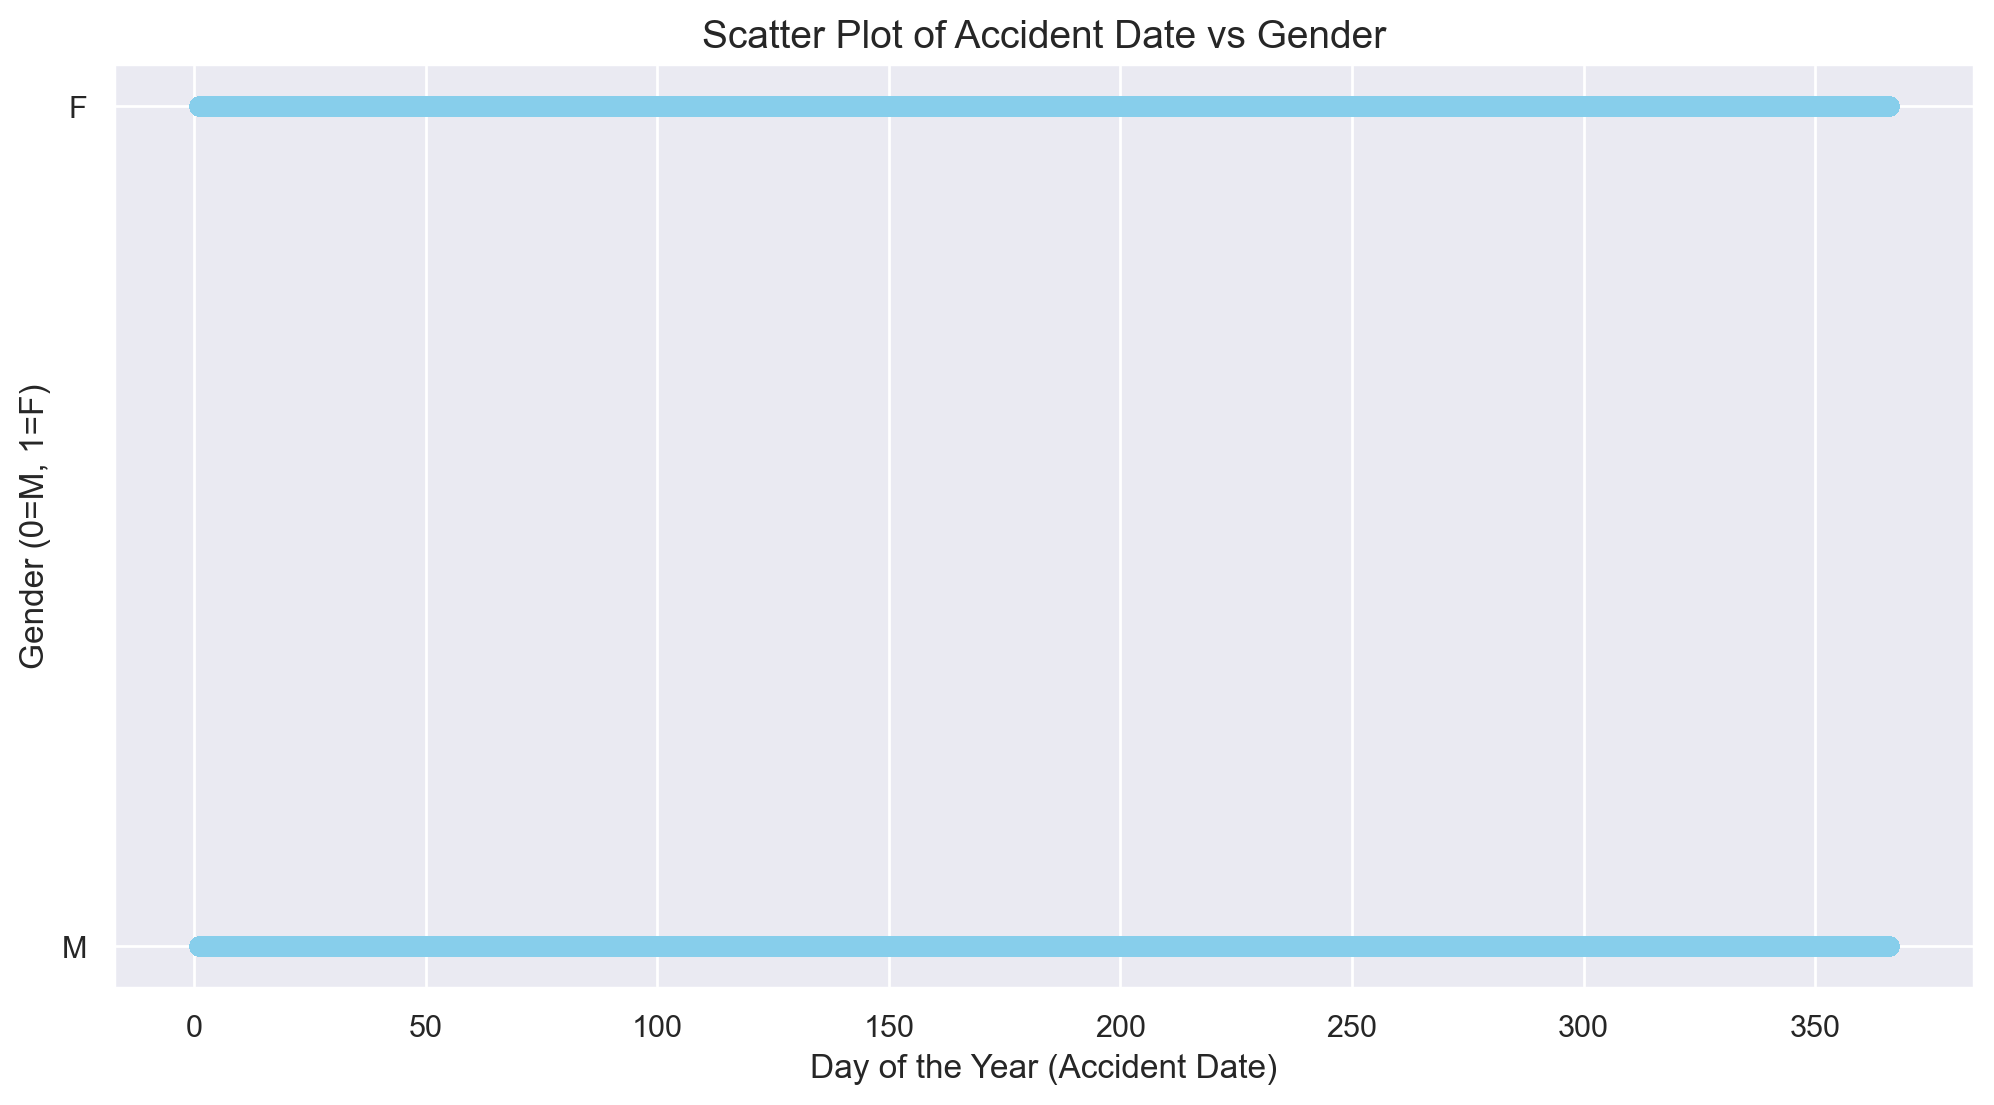

In [82]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(wcb['Day of Year'], wcb['Gender Numeric'], alpha=0.6, color='skyblue')

# Add labels and title
plt.title('Scatter Plot of Accident Date vs Gender', fontsize=14)
plt.xlabel('Day of the Year (Accident Date)', fontsize=12)
plt.ylabel('Gender (0=M, 1=F)', fontsize=12)

# Customizing the y-ticks for better interpretation
plt.yticks([0, 1], ['M', 'F'])

# Show the plot
plt.show()

## Age at Injury

In [84]:
# Define age categories
bins = [0, 17, 30, 40, 50, 60, 74, 100]
labels = ['0-17', '18-30', '31-40', '41-50', '51-60', '61-74', '75+']

# Create a new column for age categories
wcb['Age Category'] = pd.cut(wcb['Age at Injury'], bins=bins, labels=labels, right=False)

In [85]:
# Count the number of occurrences in each age category
age_distribution = wcb['Age Category'].value_counts()

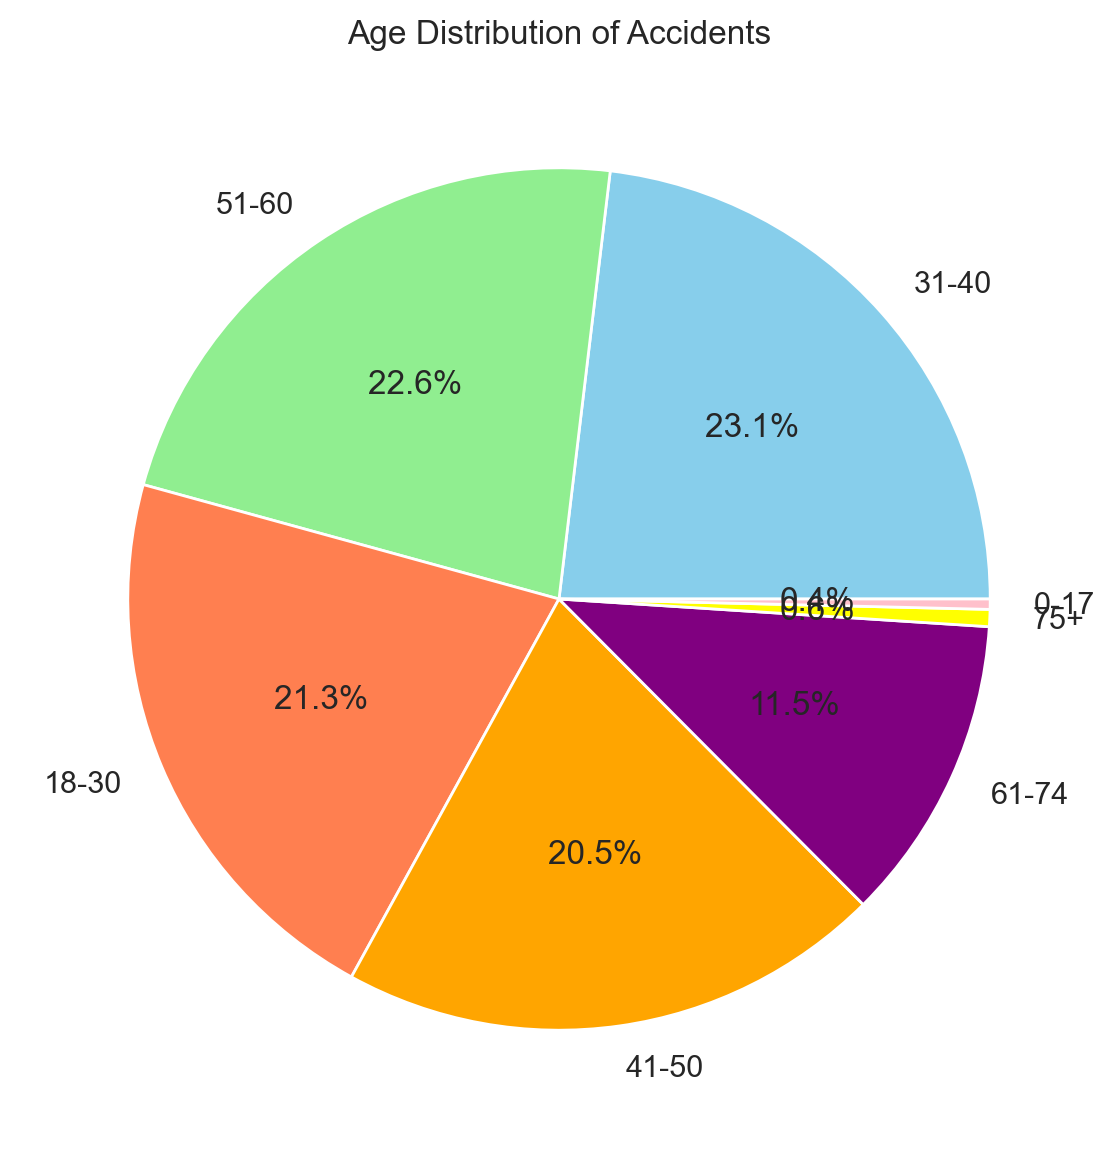

In [86]:
# Plot the pie chart
plt.figure(figsize=(7, 7))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age Distribution of Accidents')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

<Axes: >

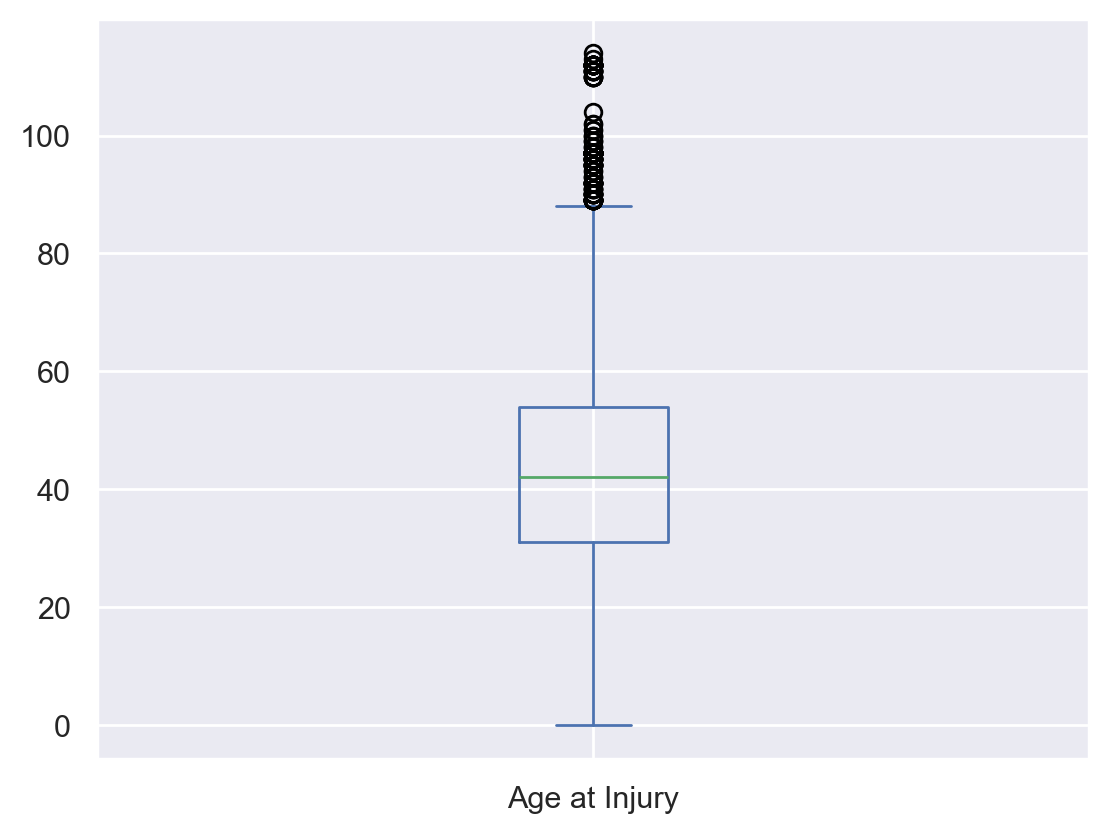

In [87]:
wcb['Age at Injury'].plot(kind='box')

In [88]:
statistics.variance(wcb['Age at Injury'].dropna())

192.29673244462808

## Histograms of all variables

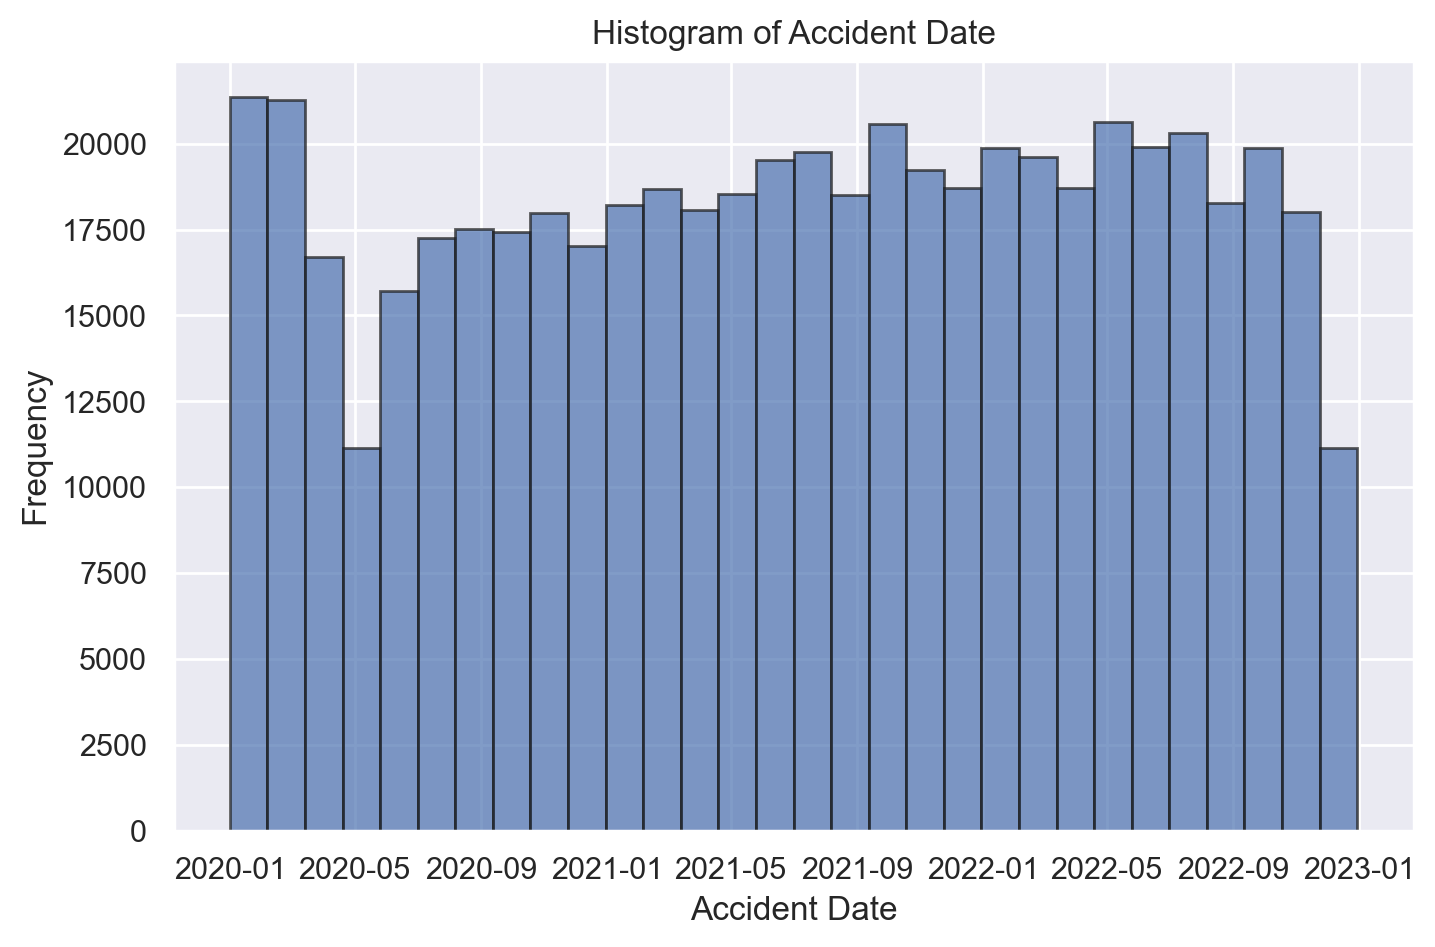

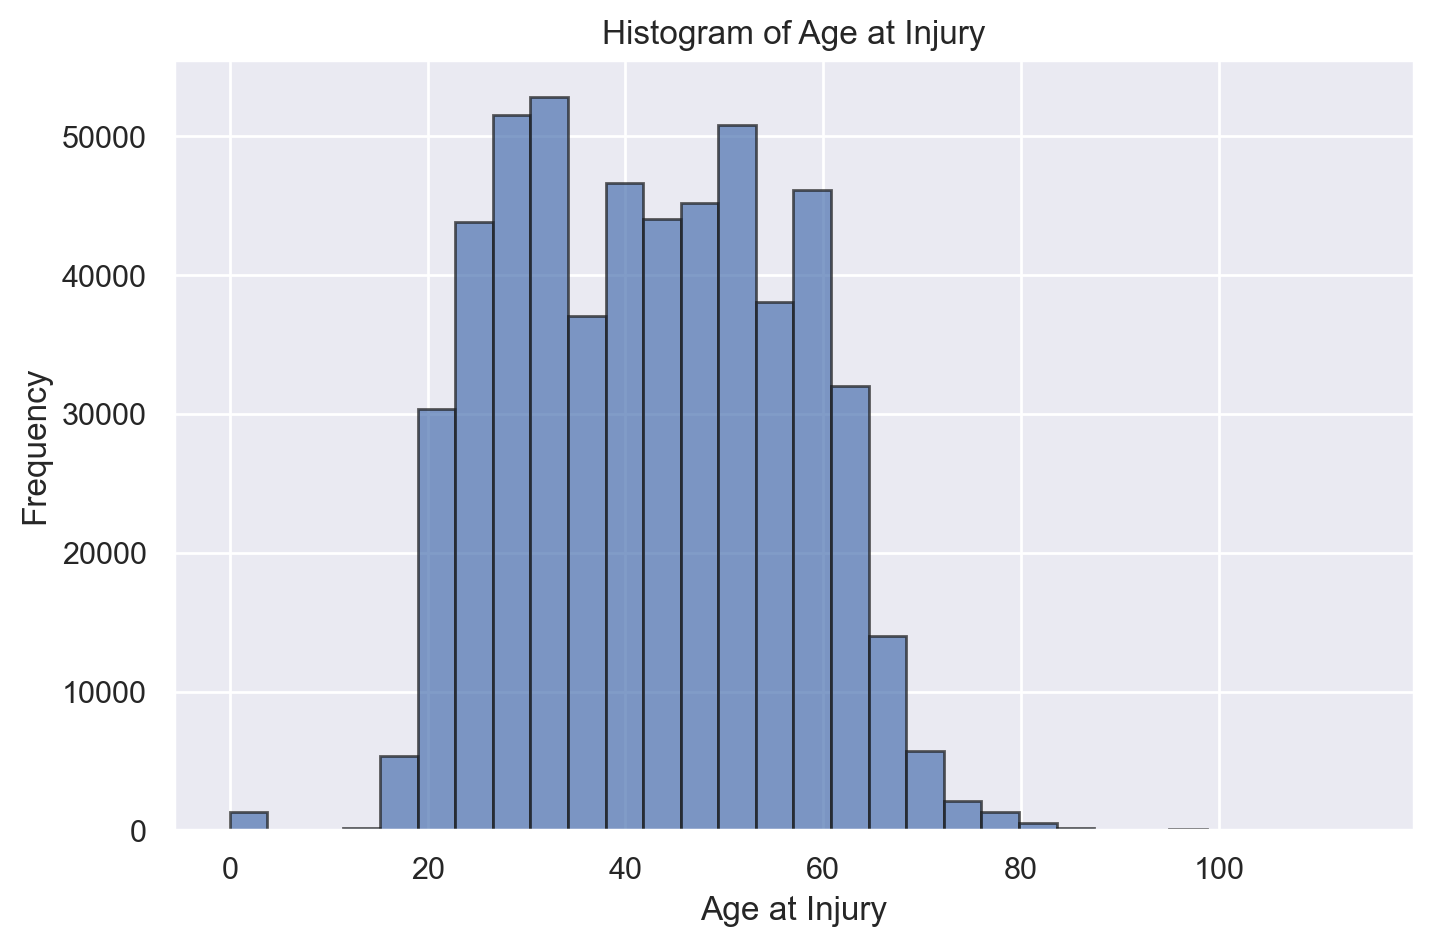

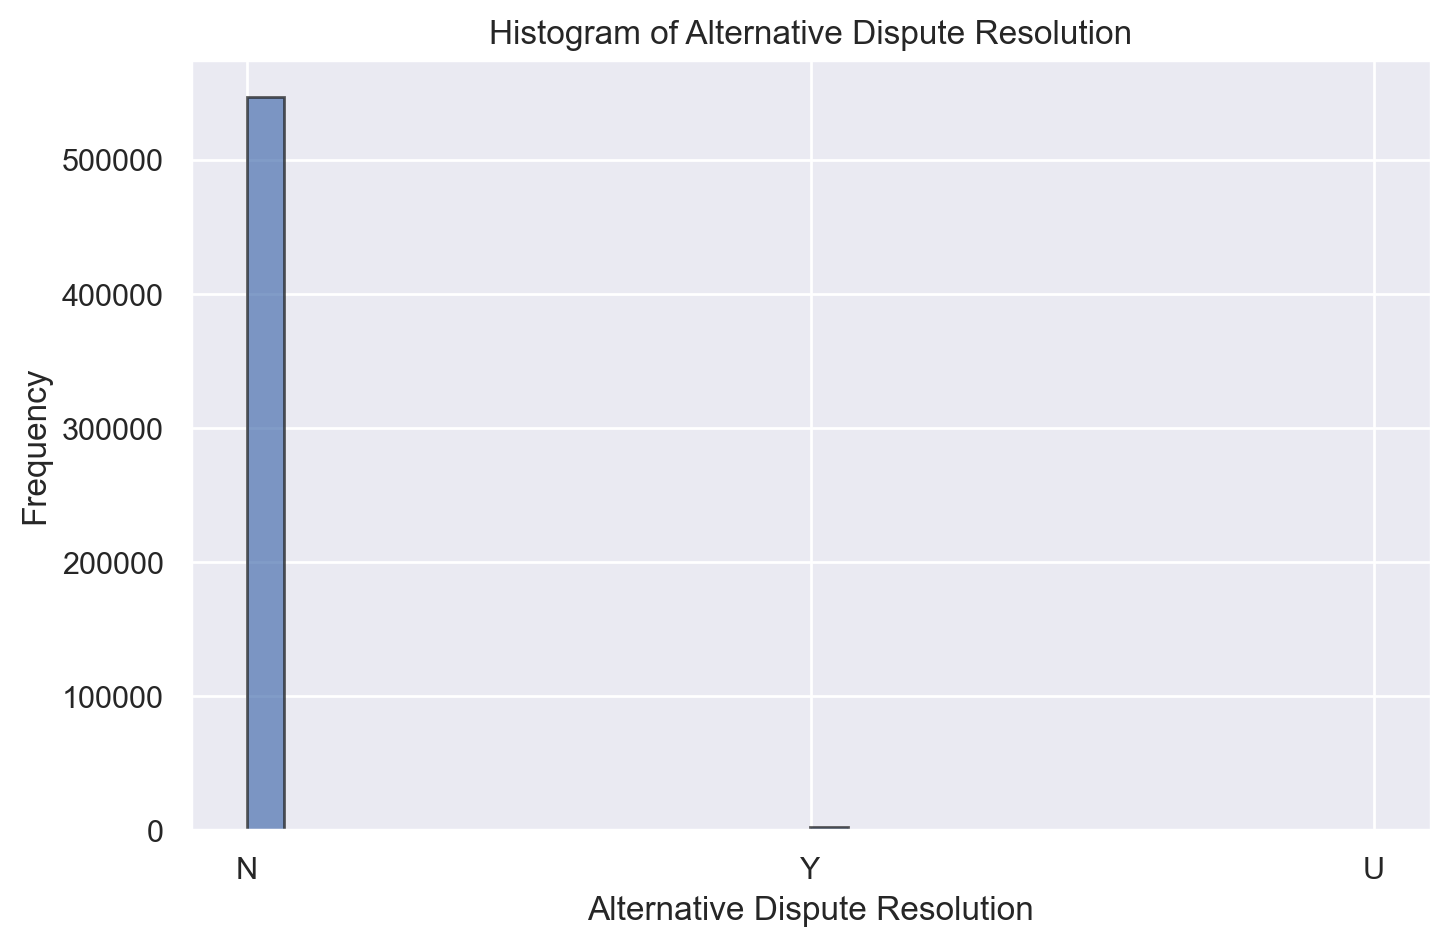

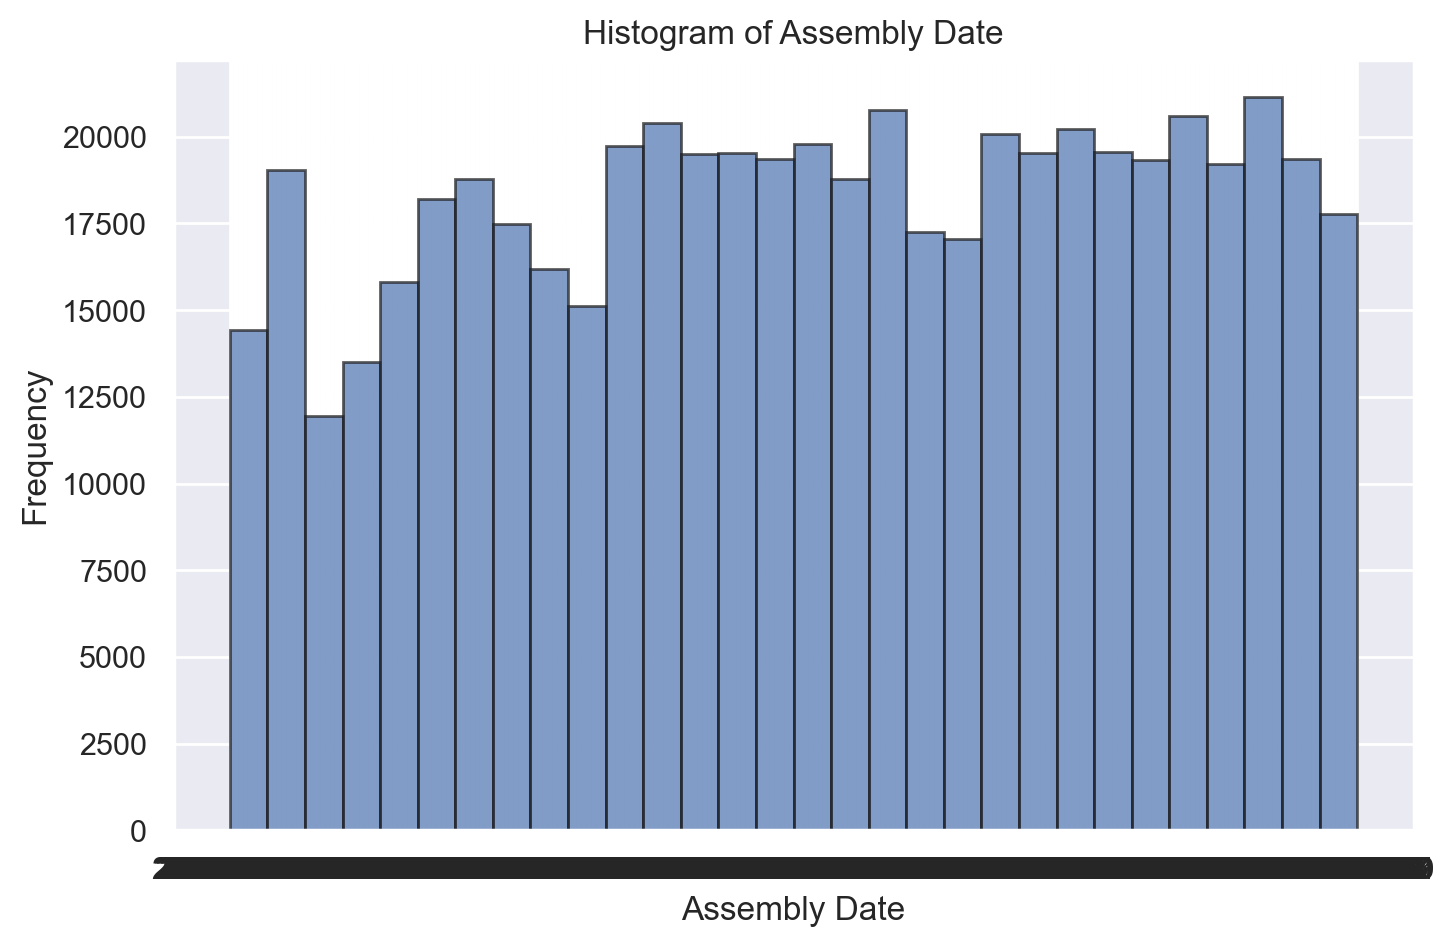

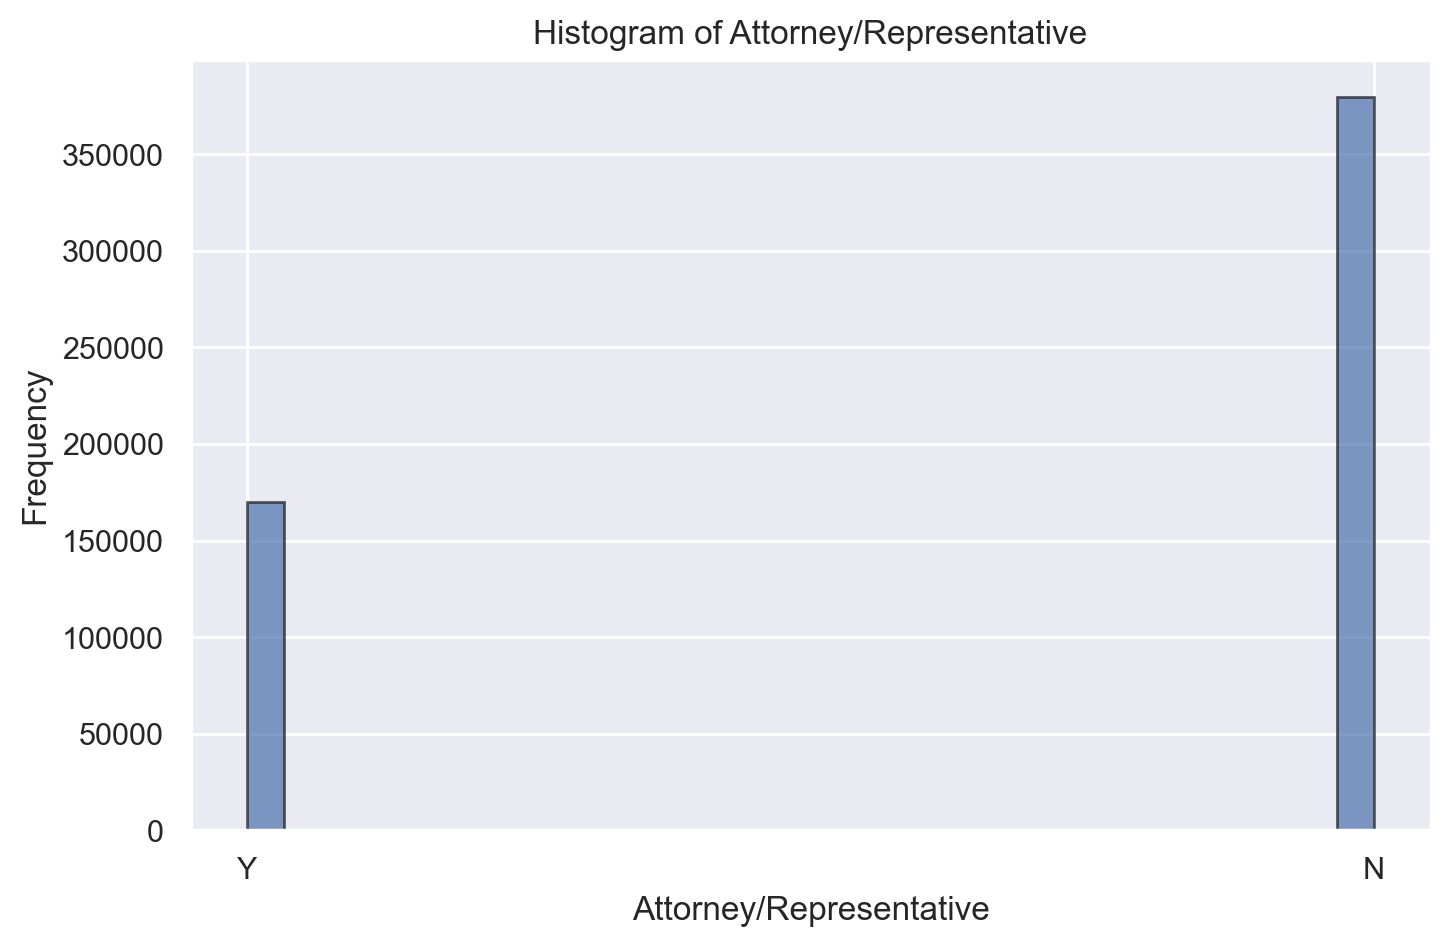

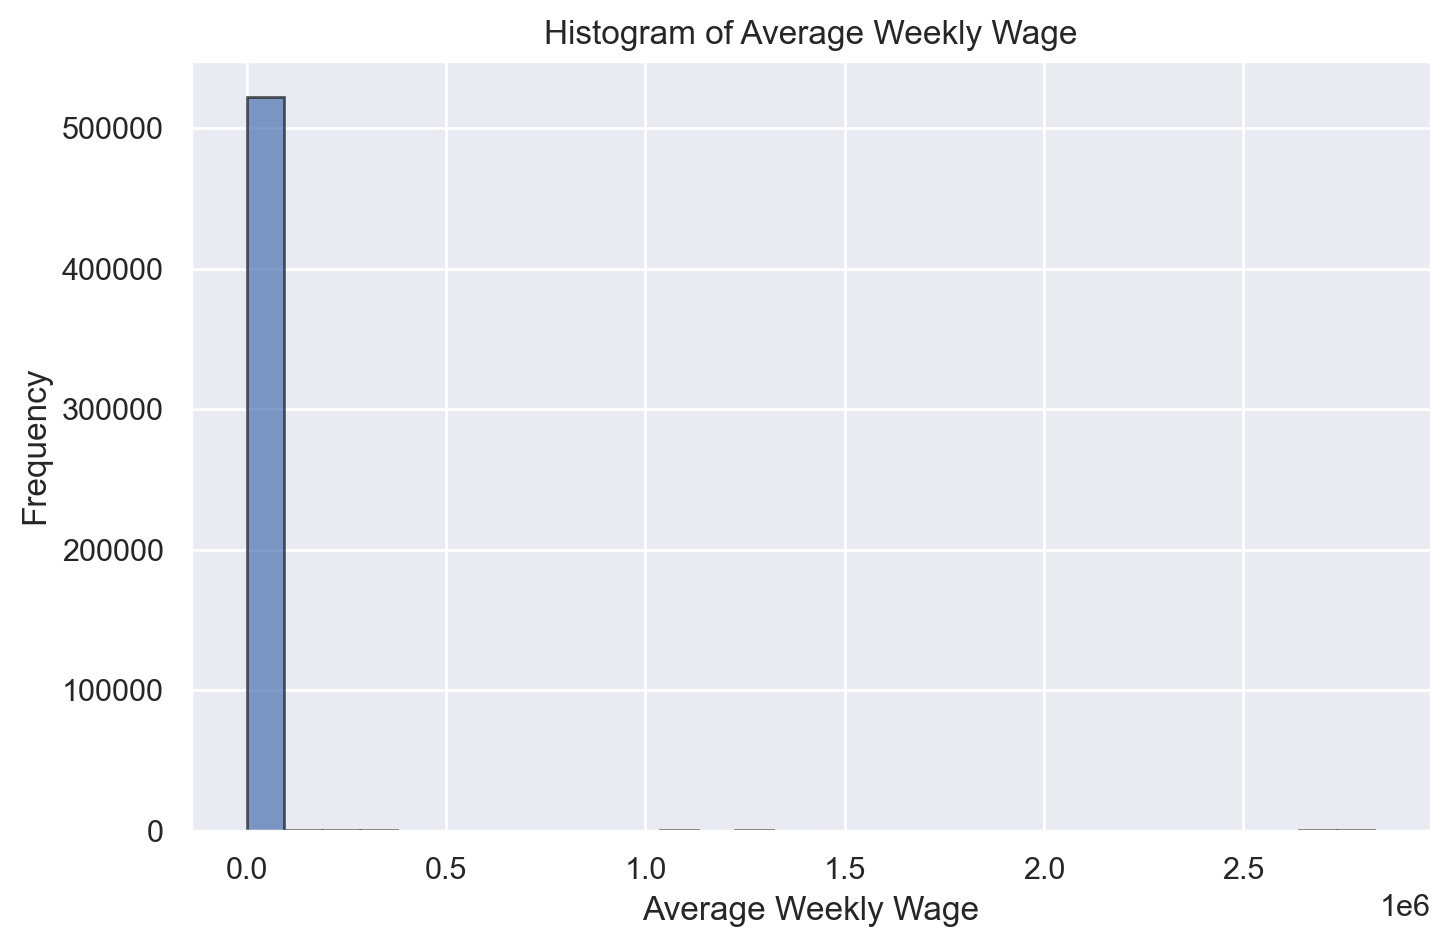

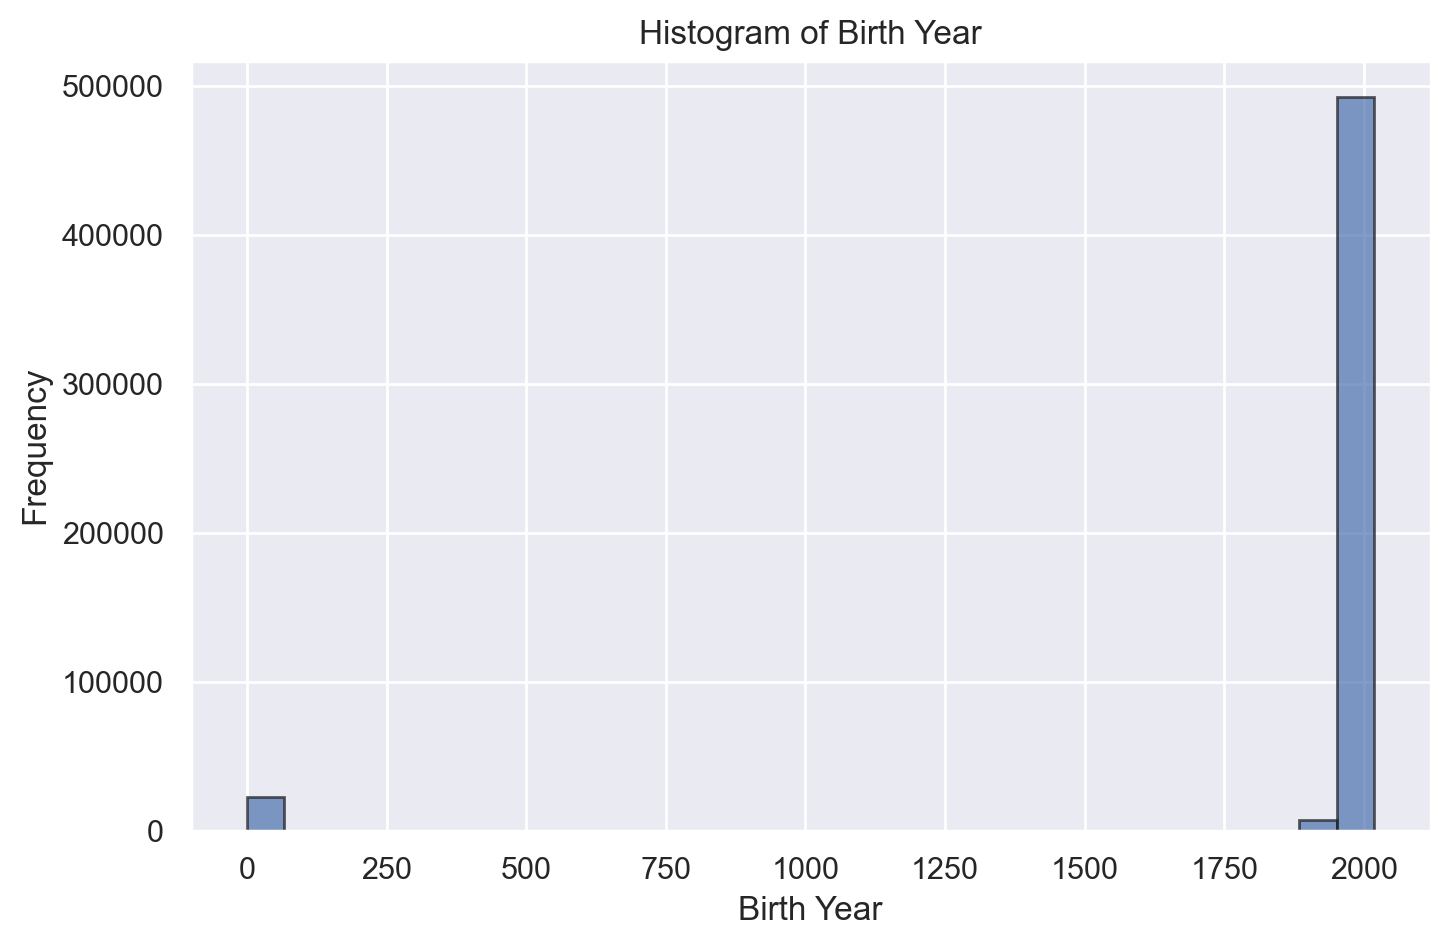

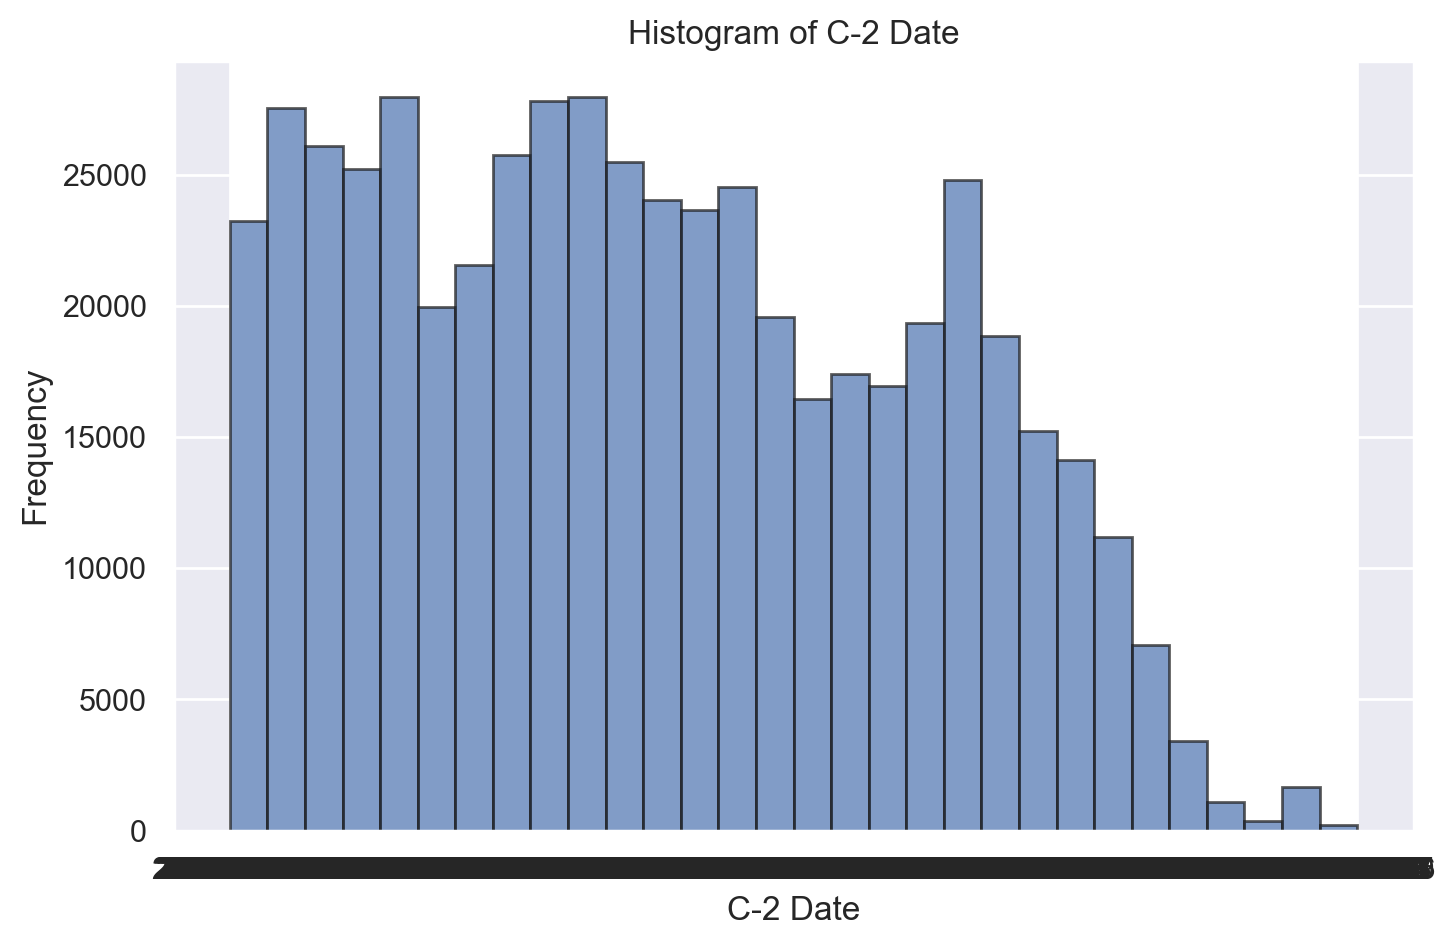

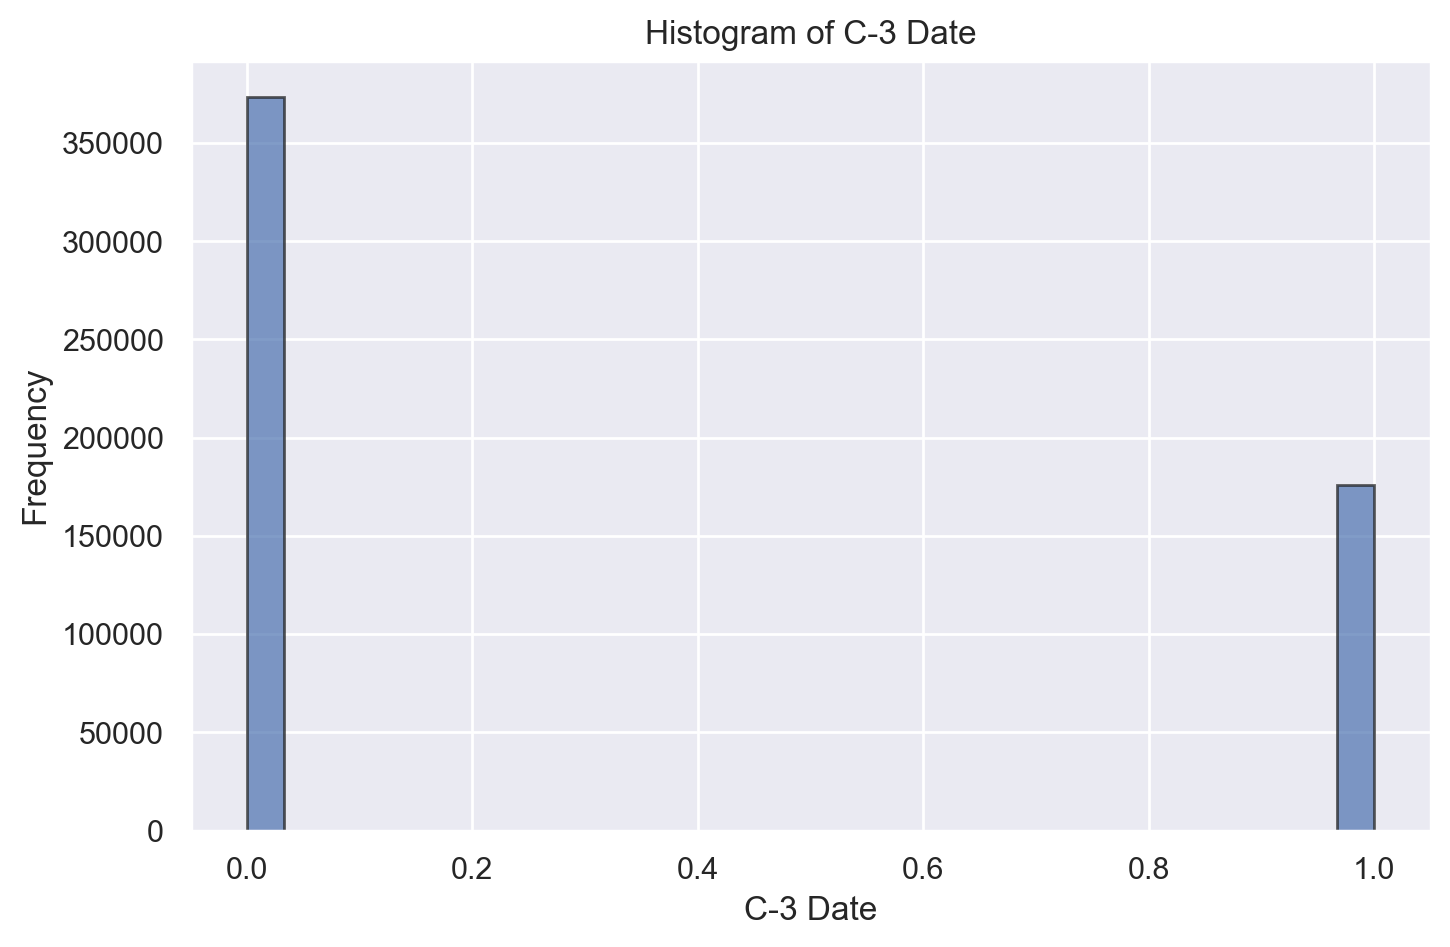

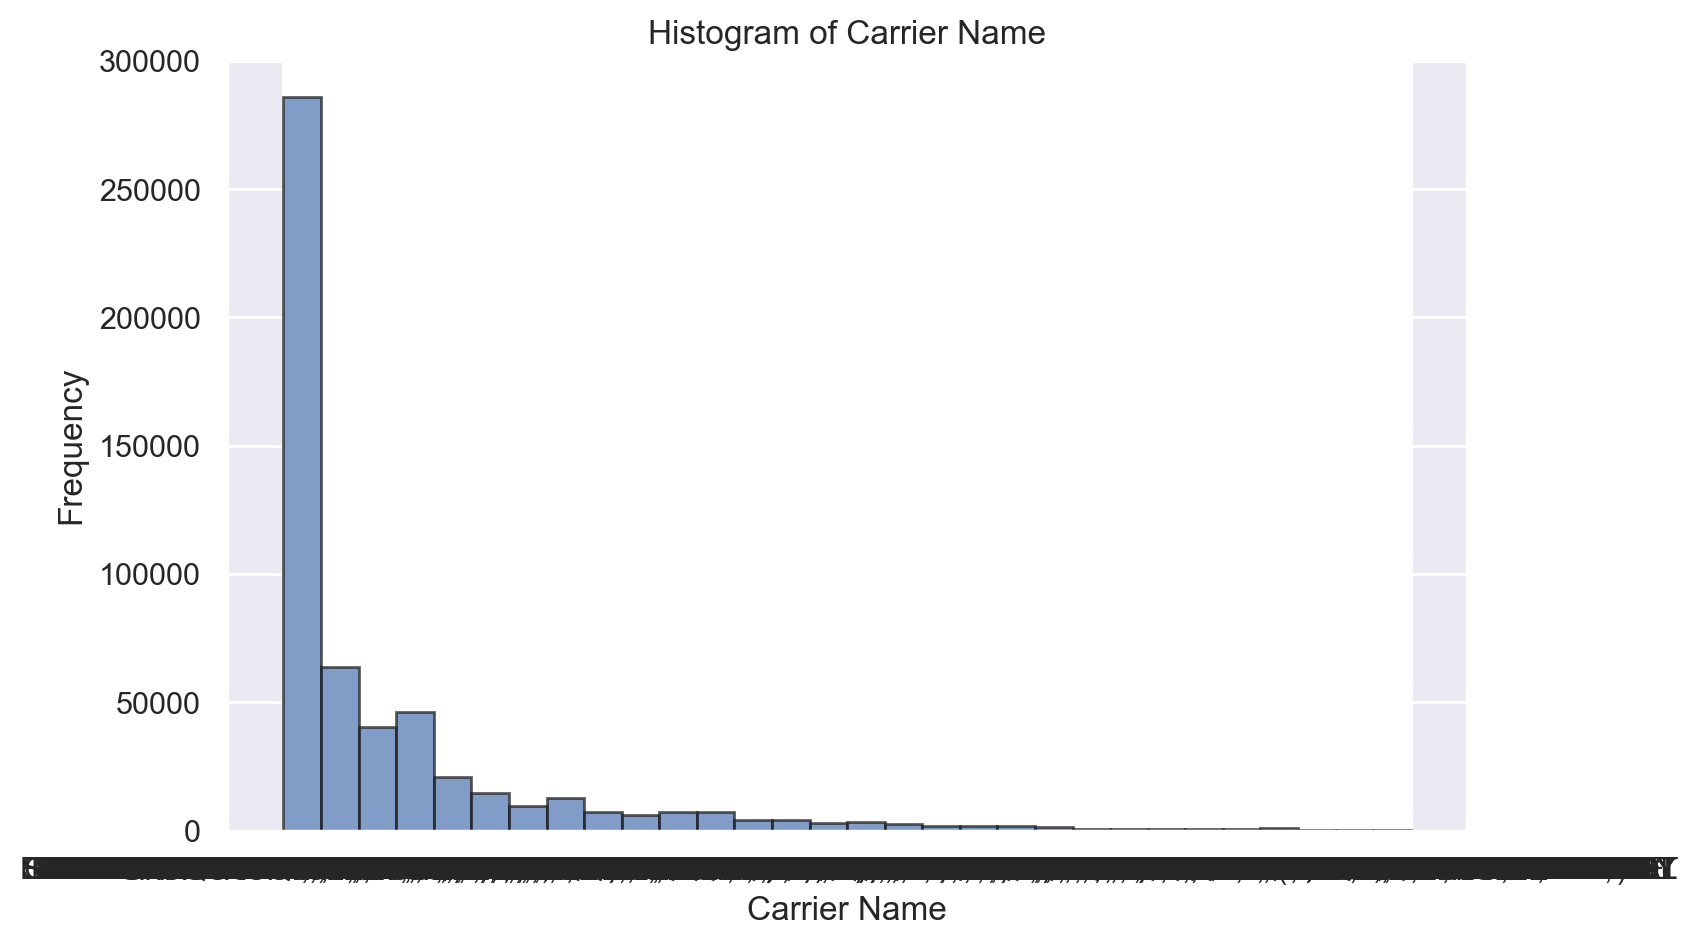

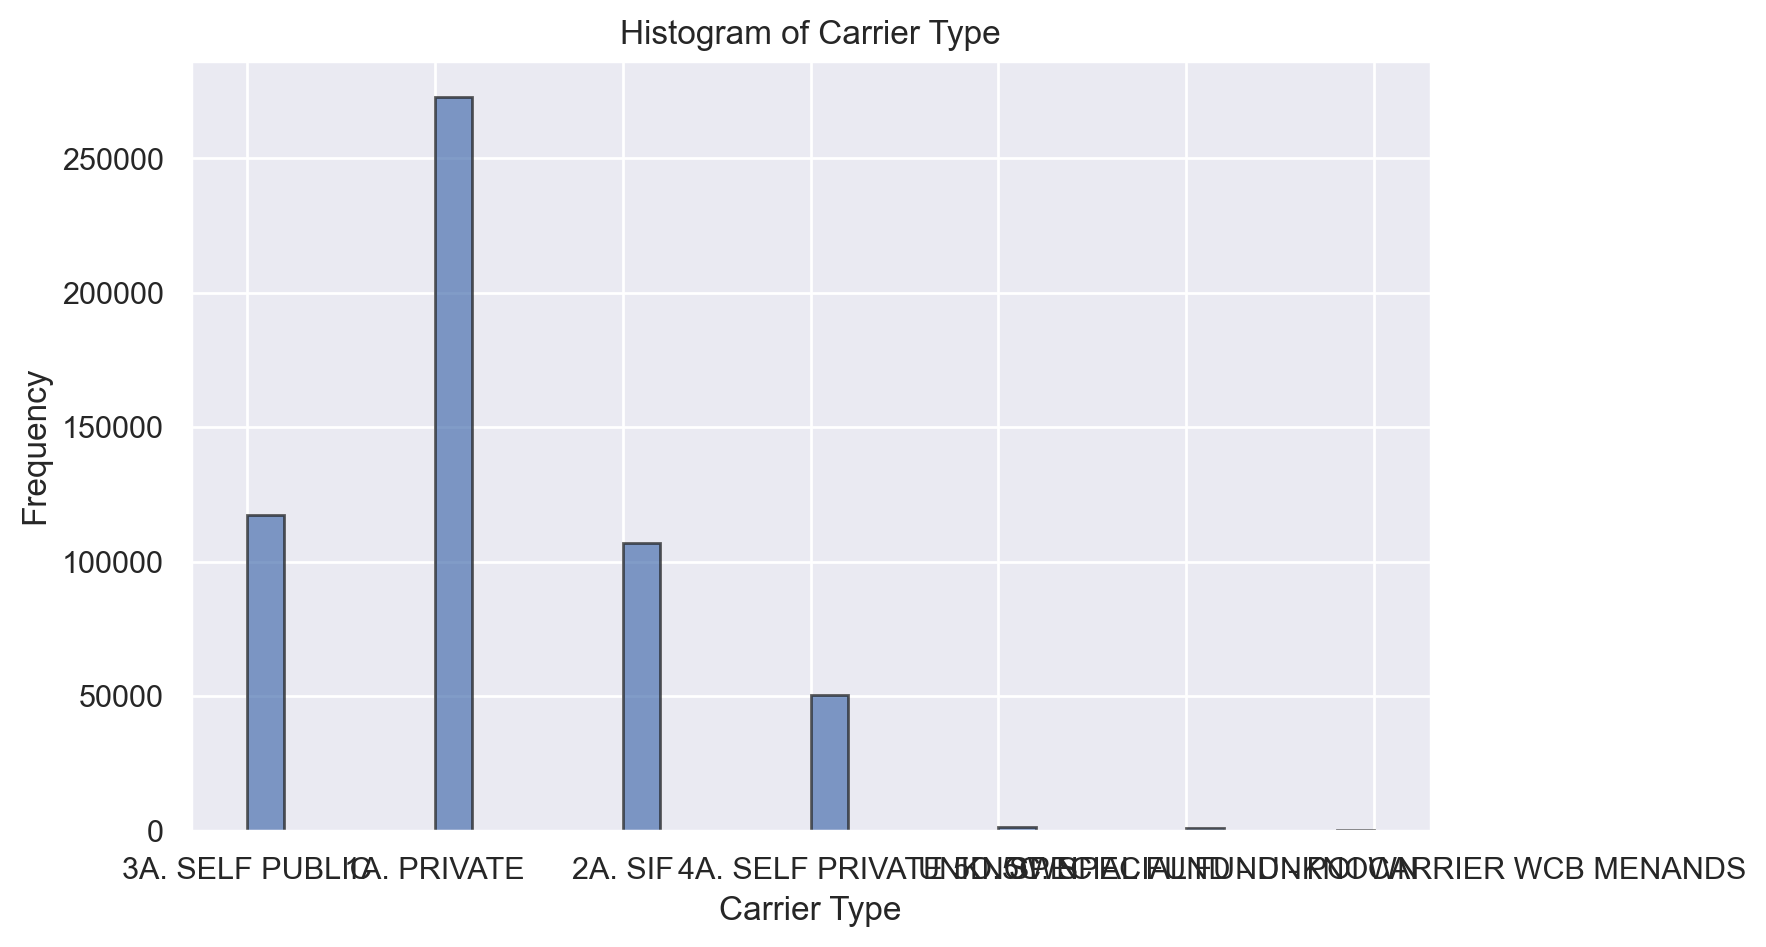

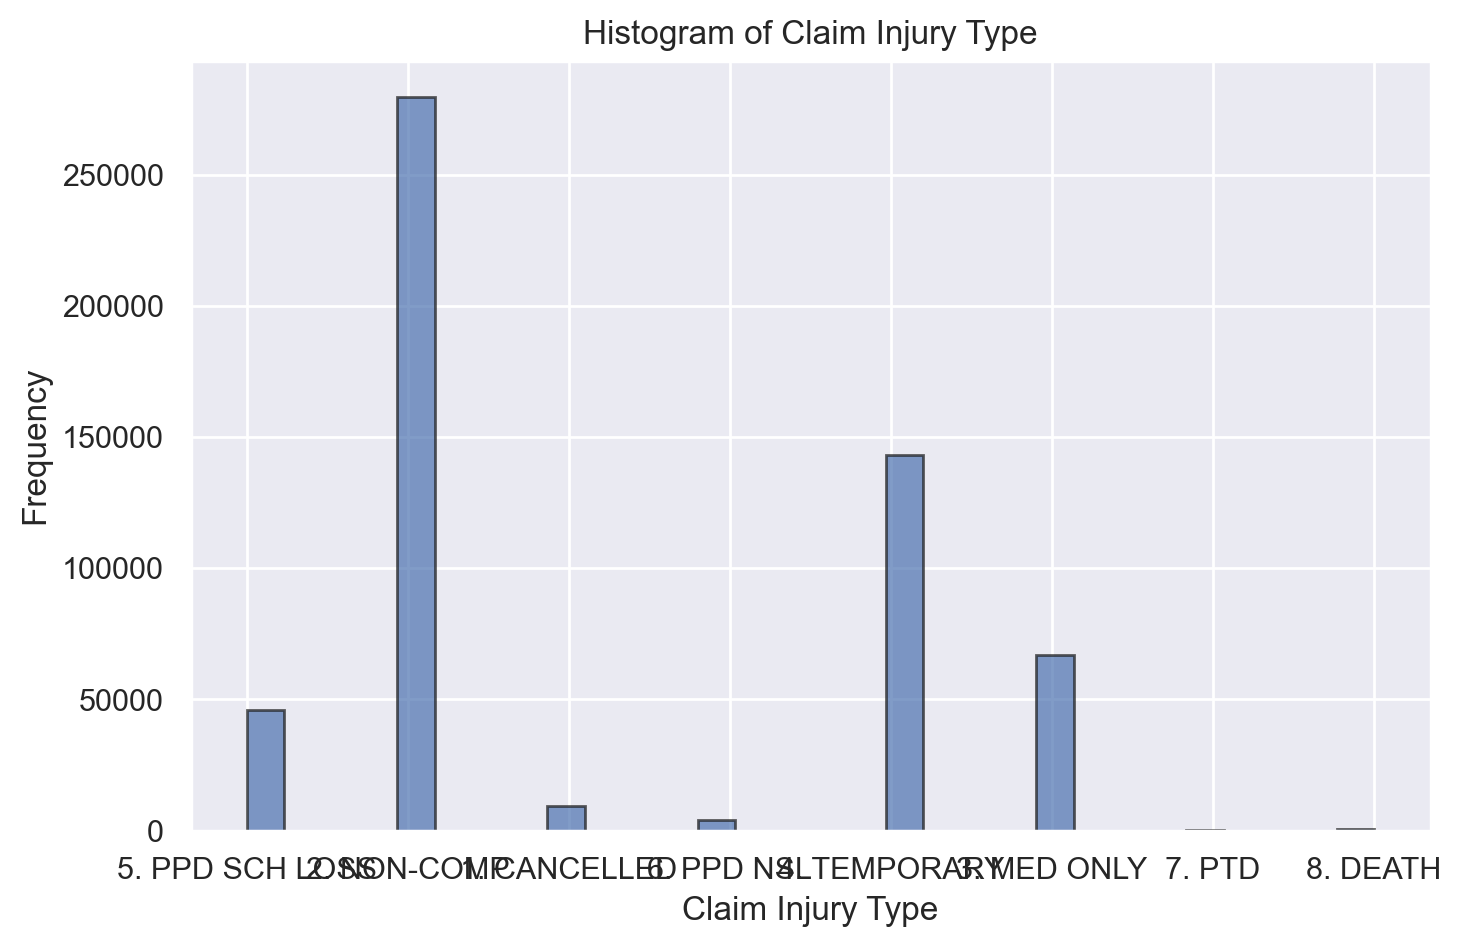

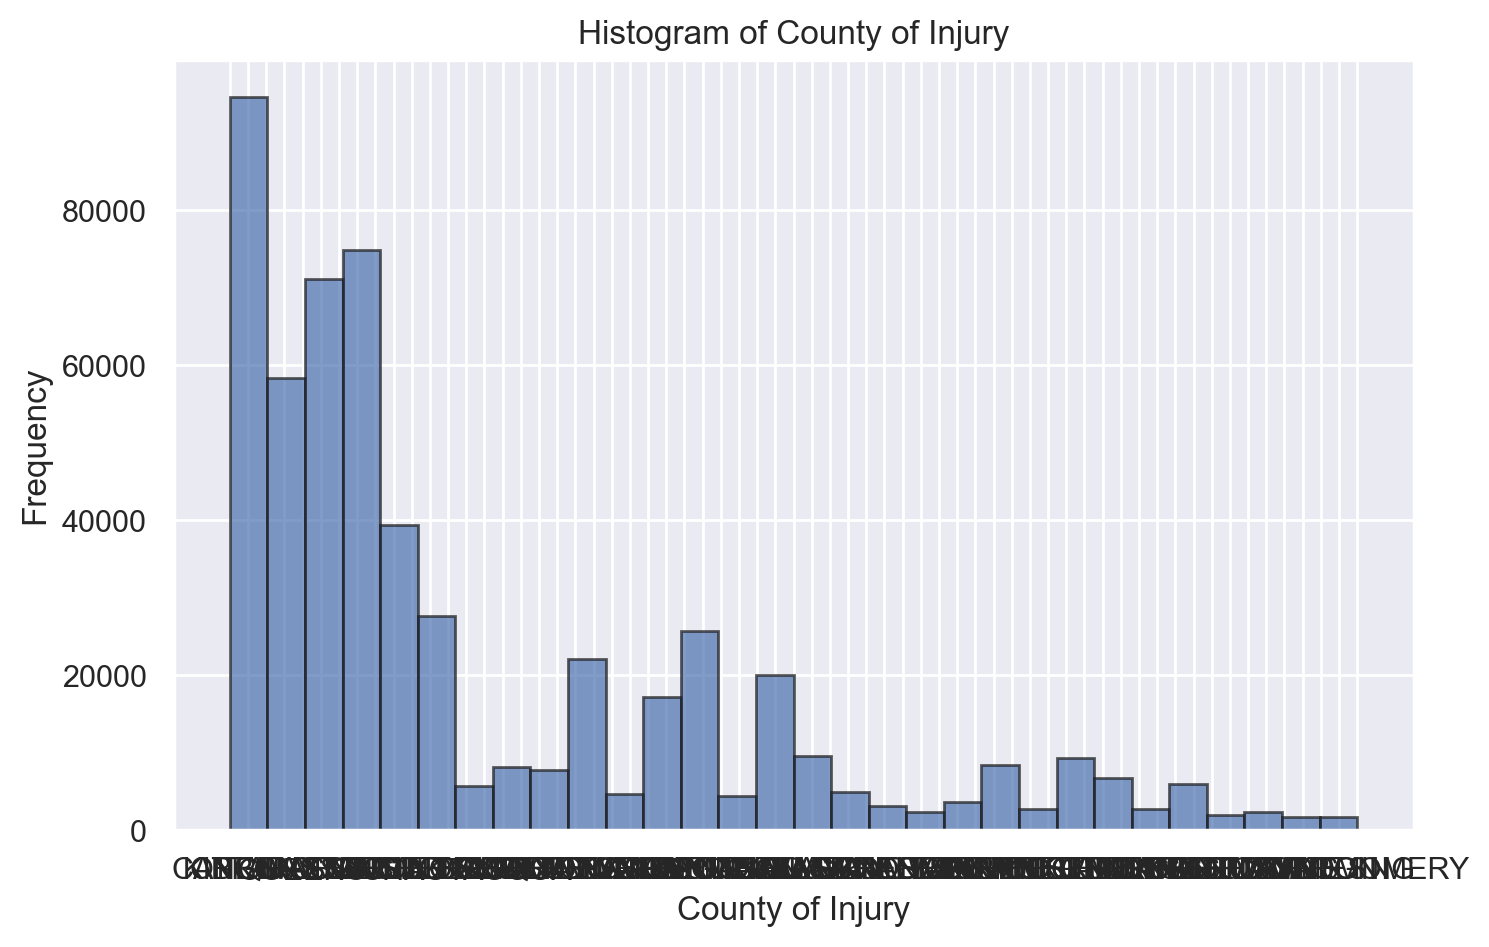

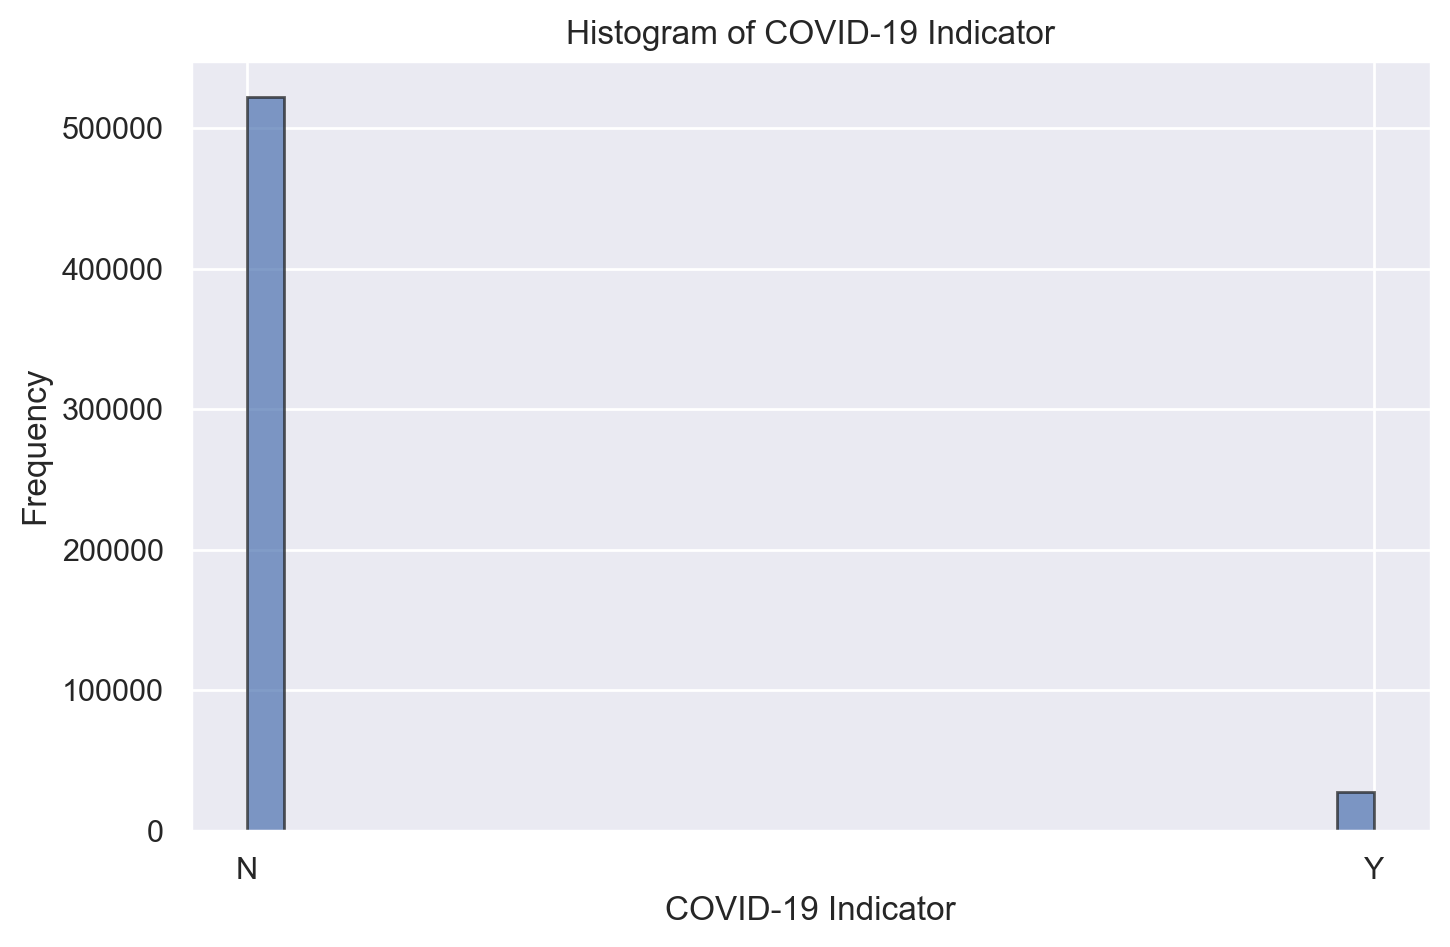

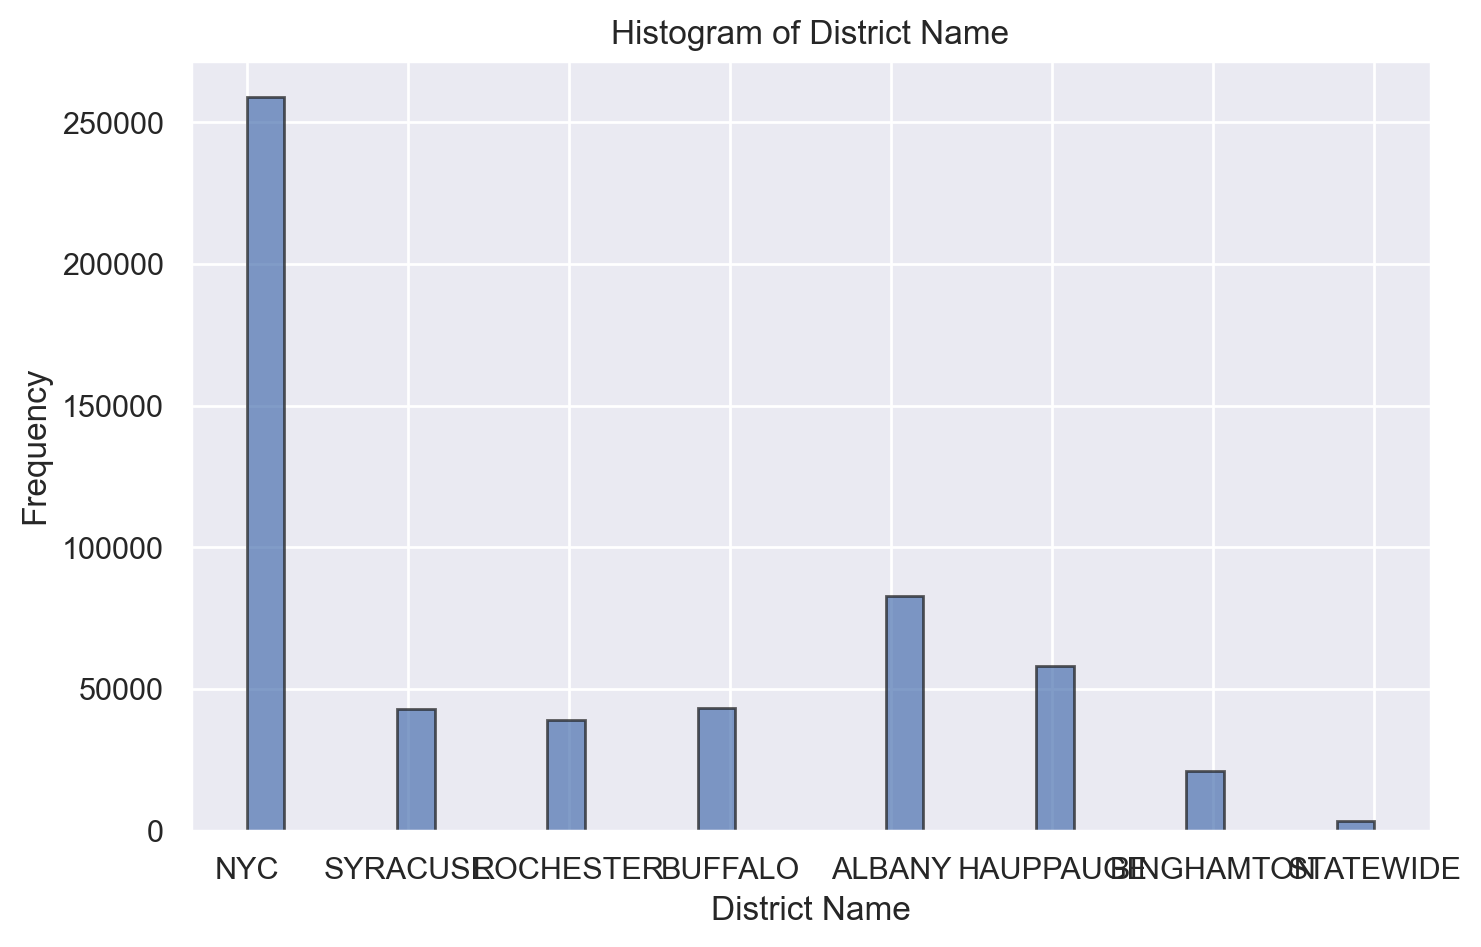

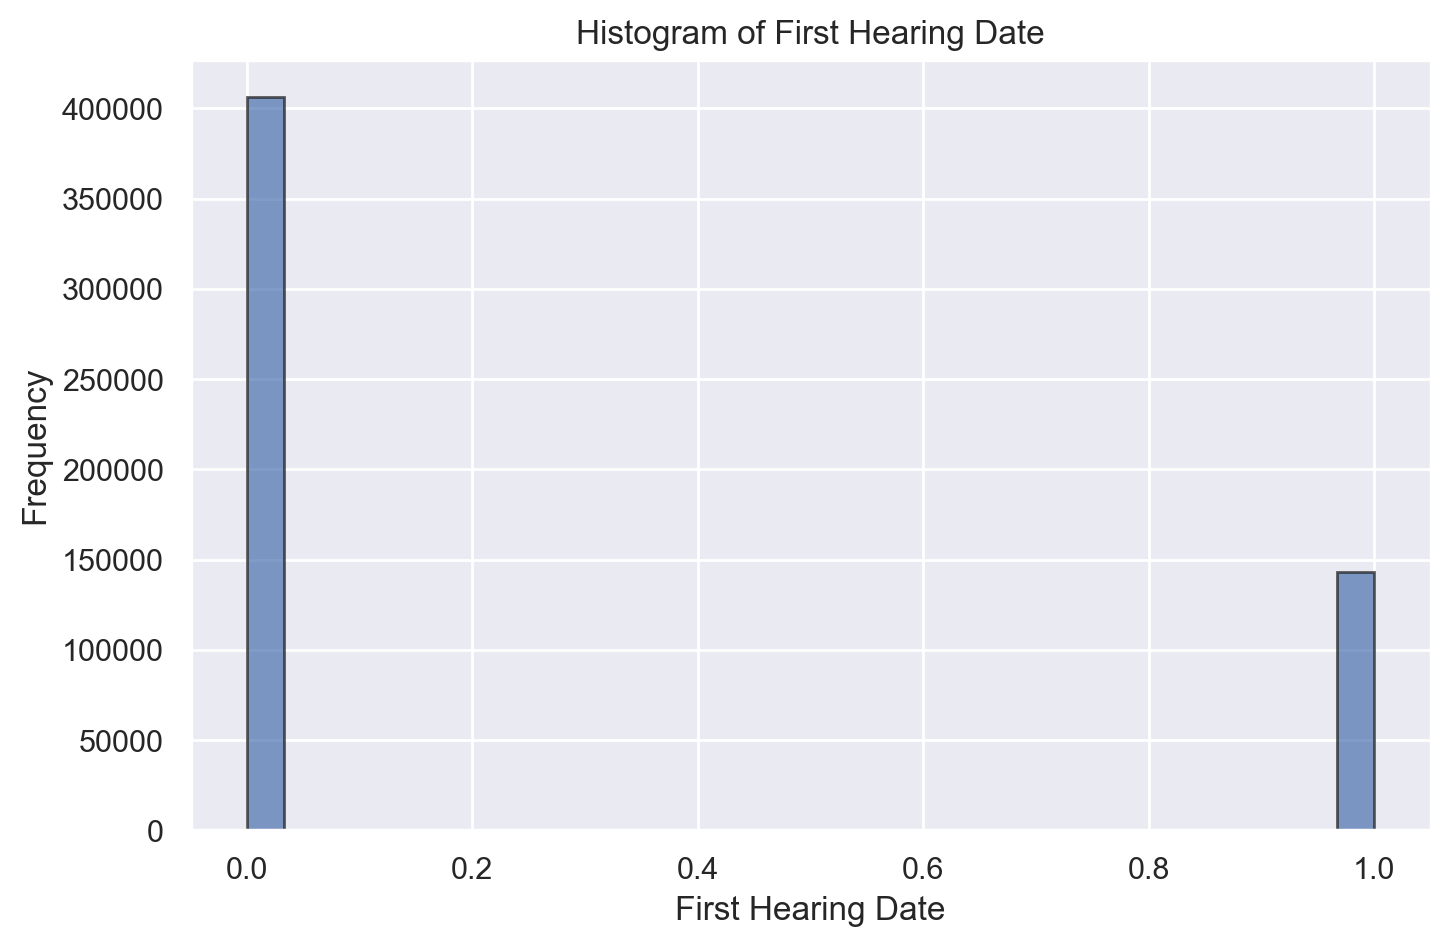

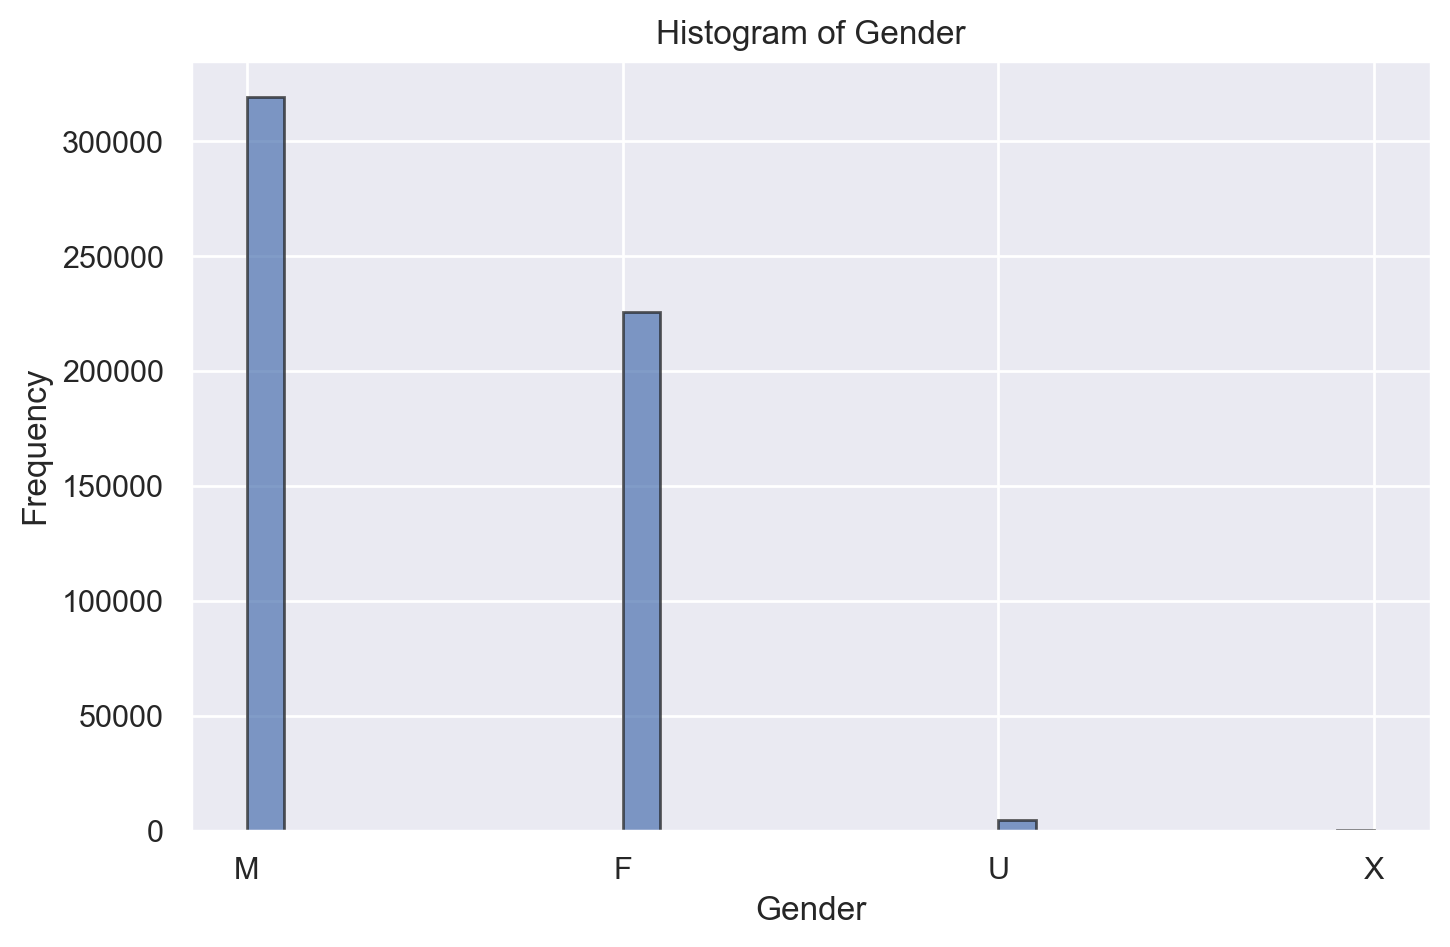

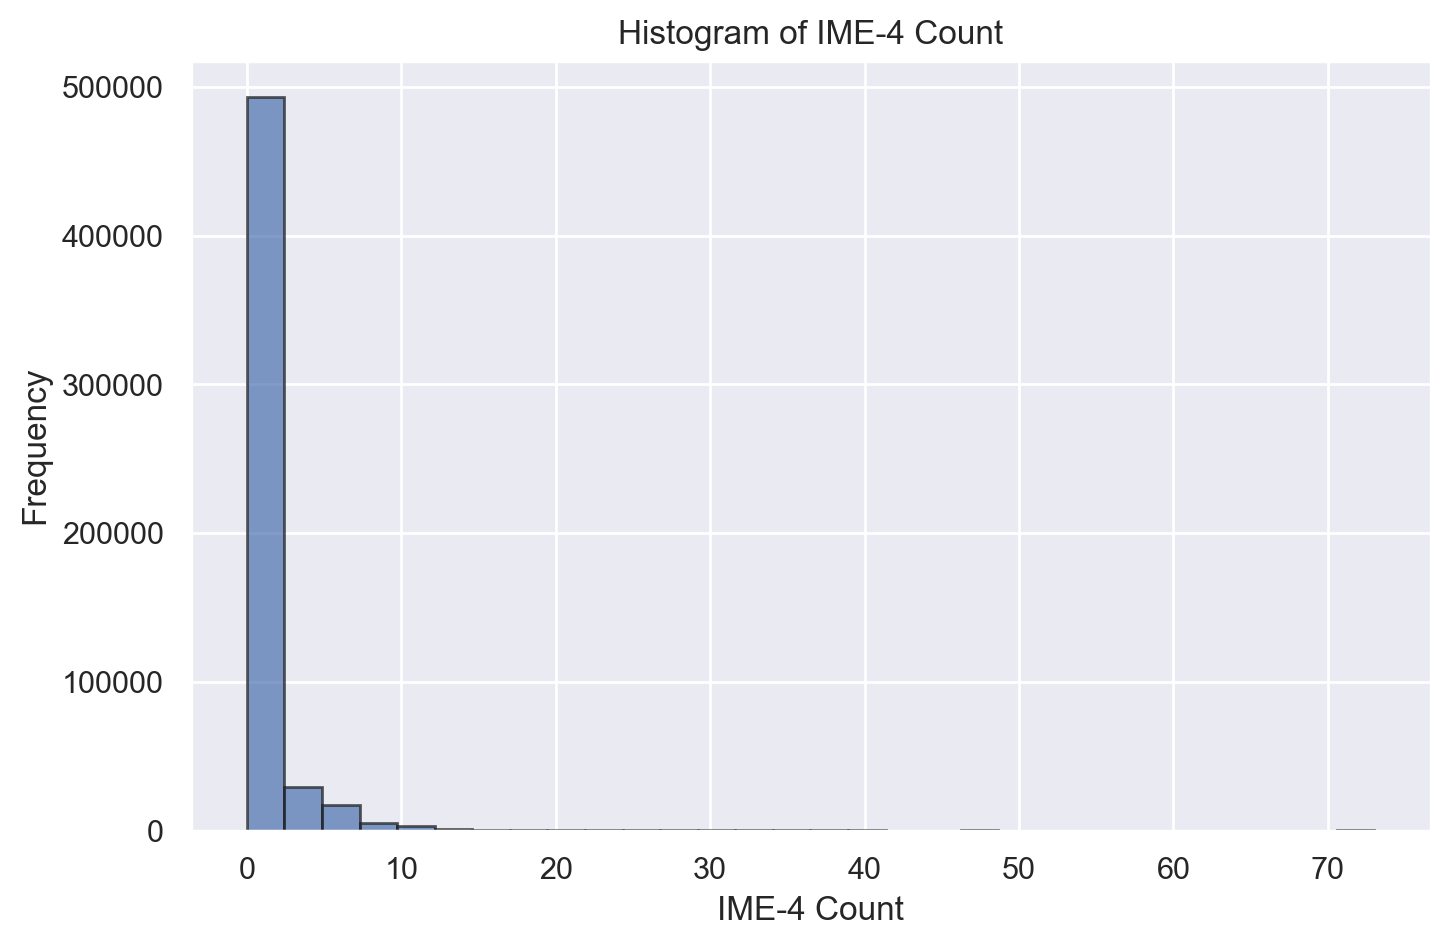

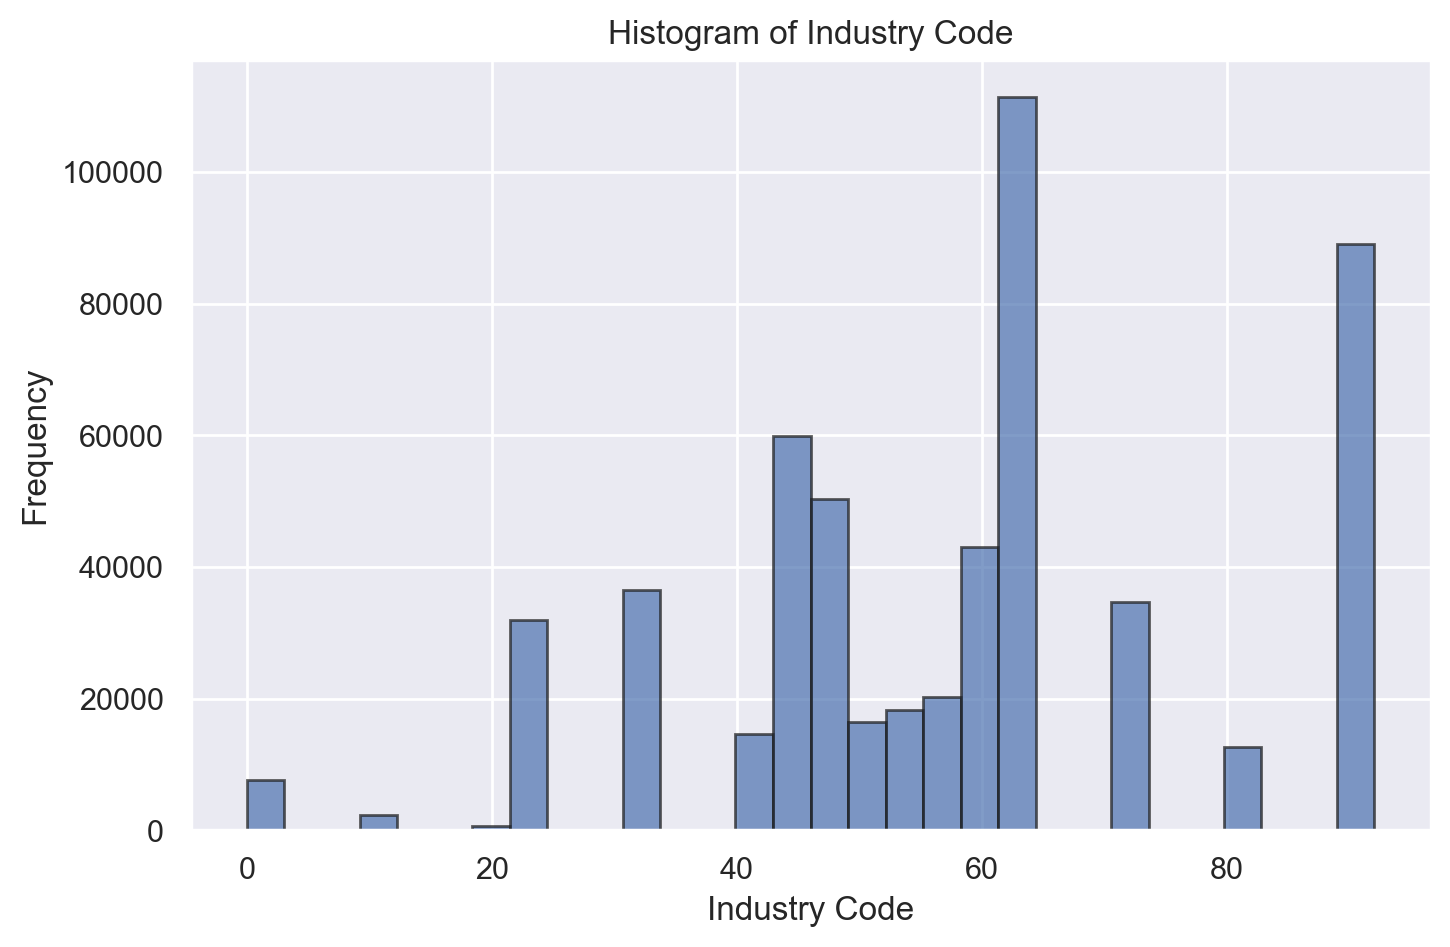

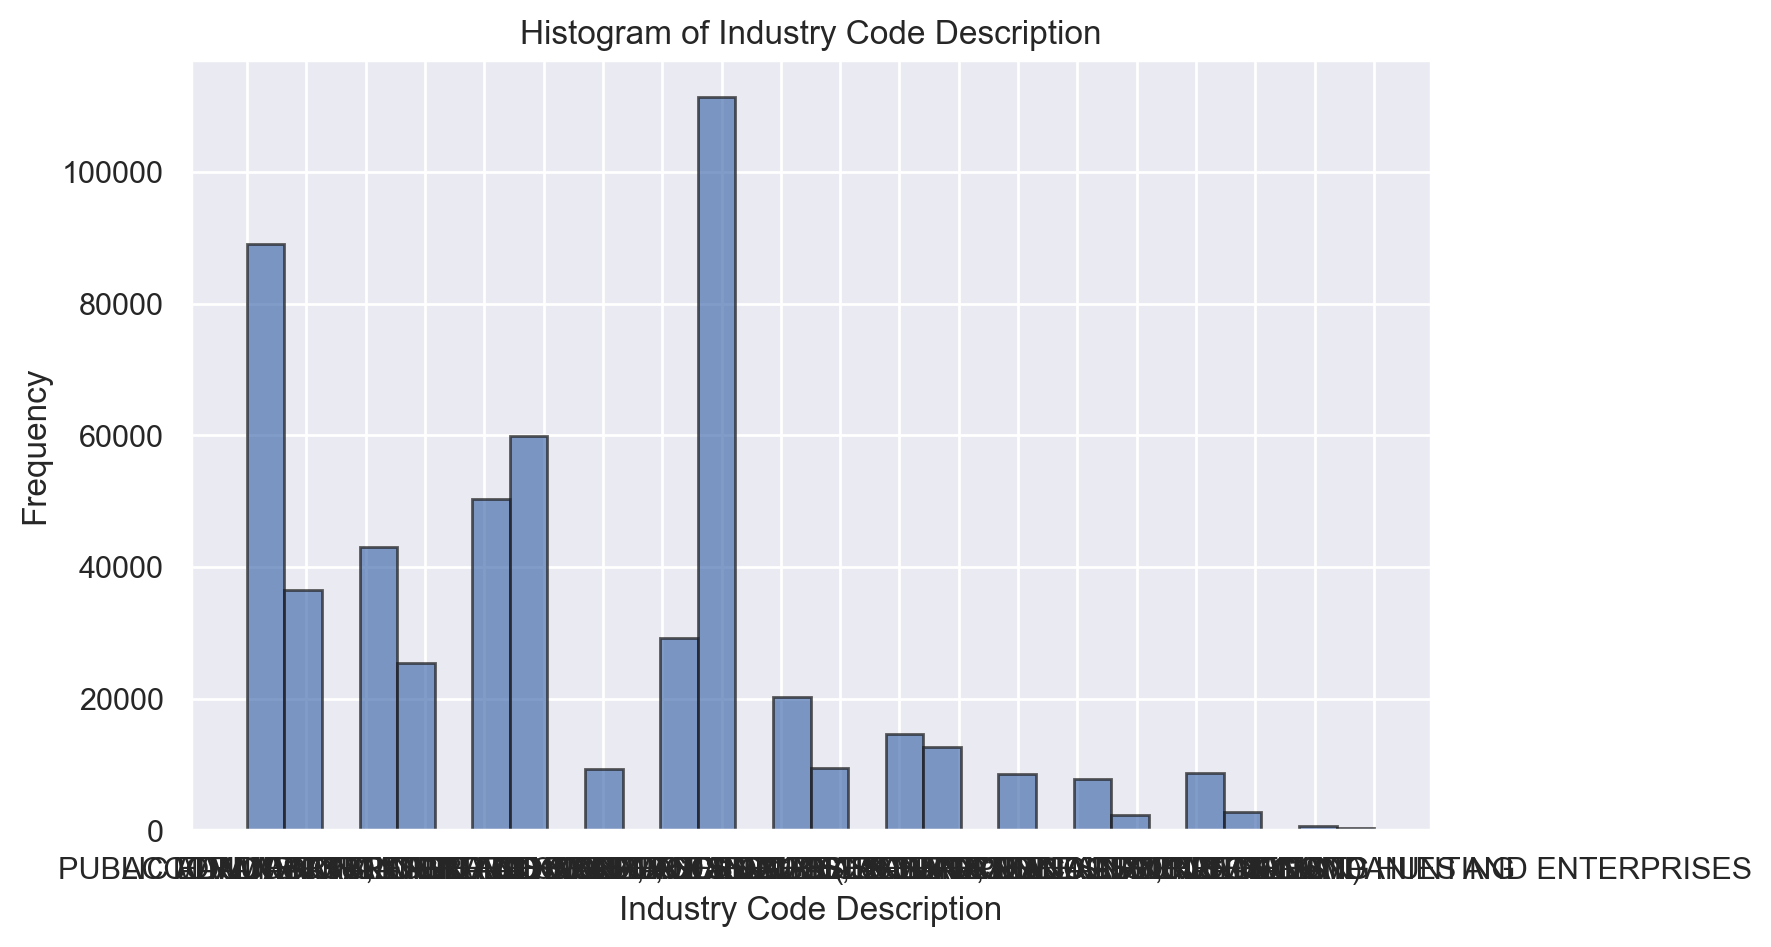

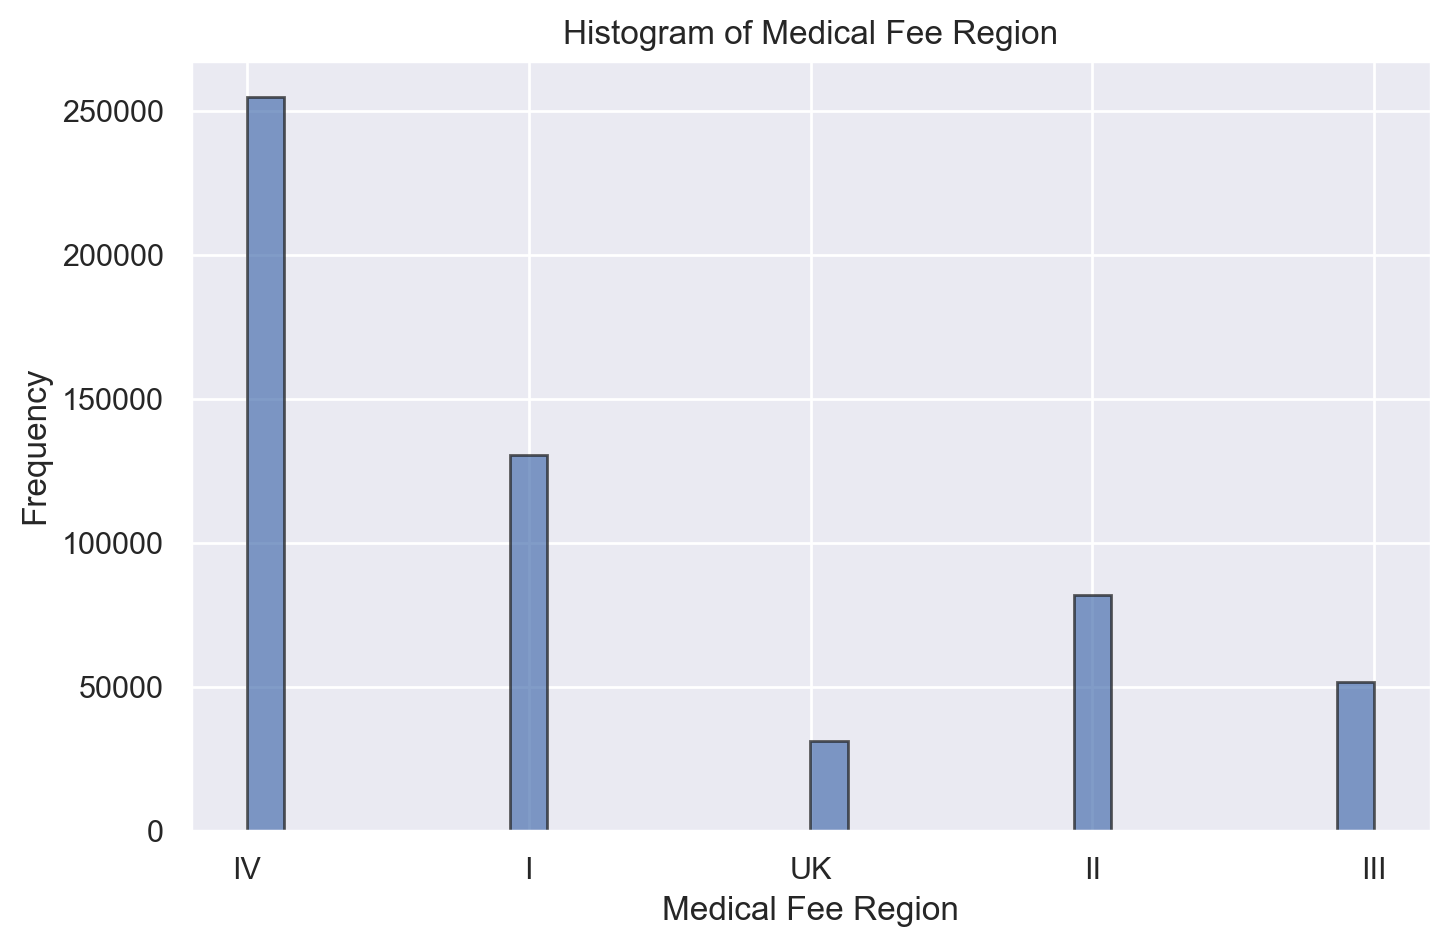

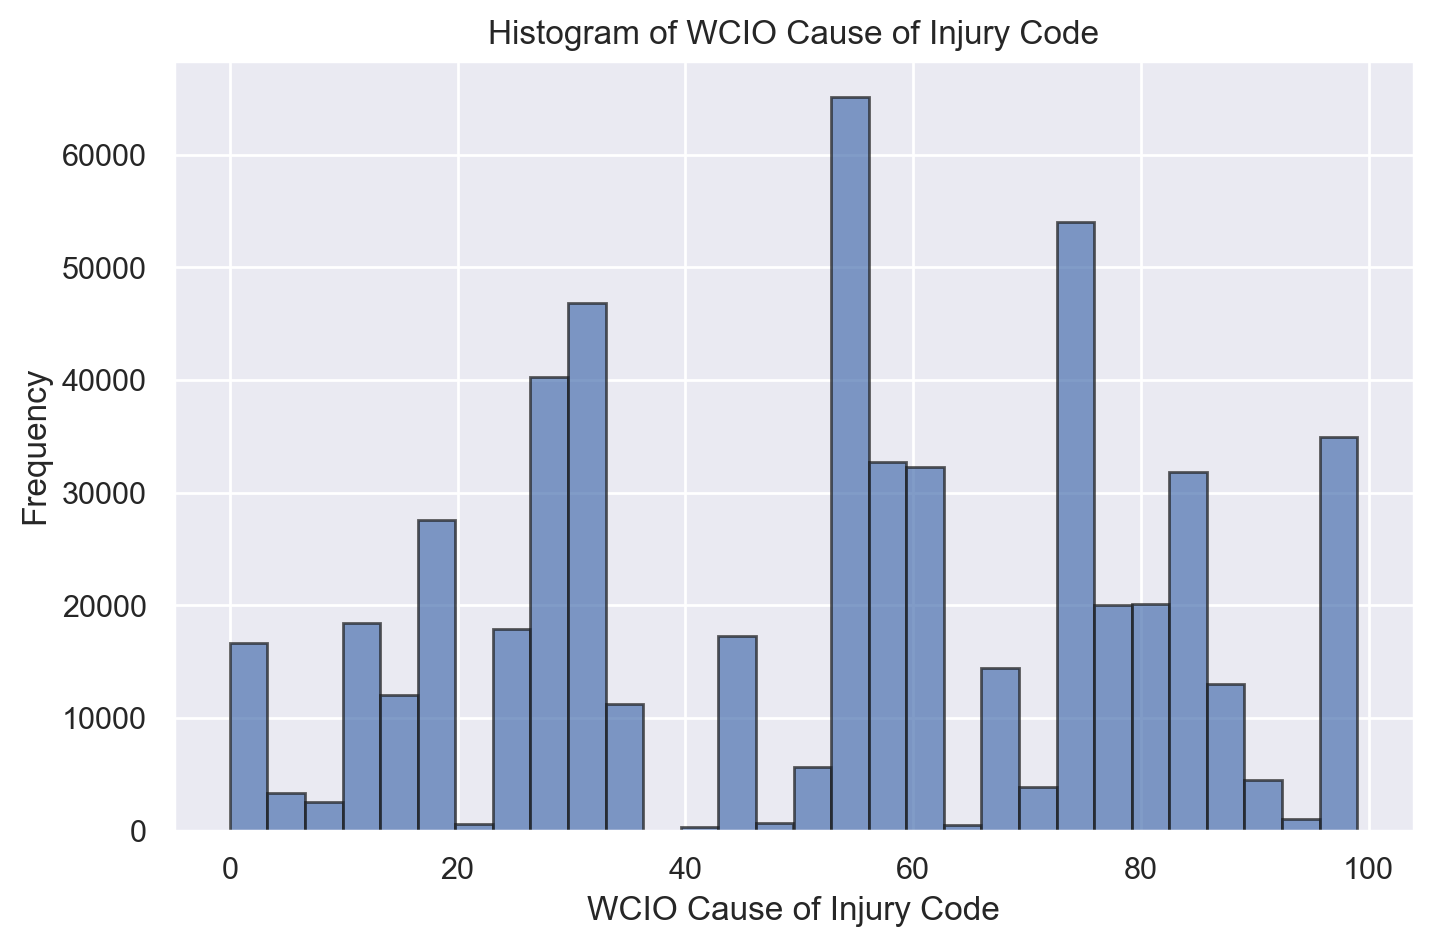

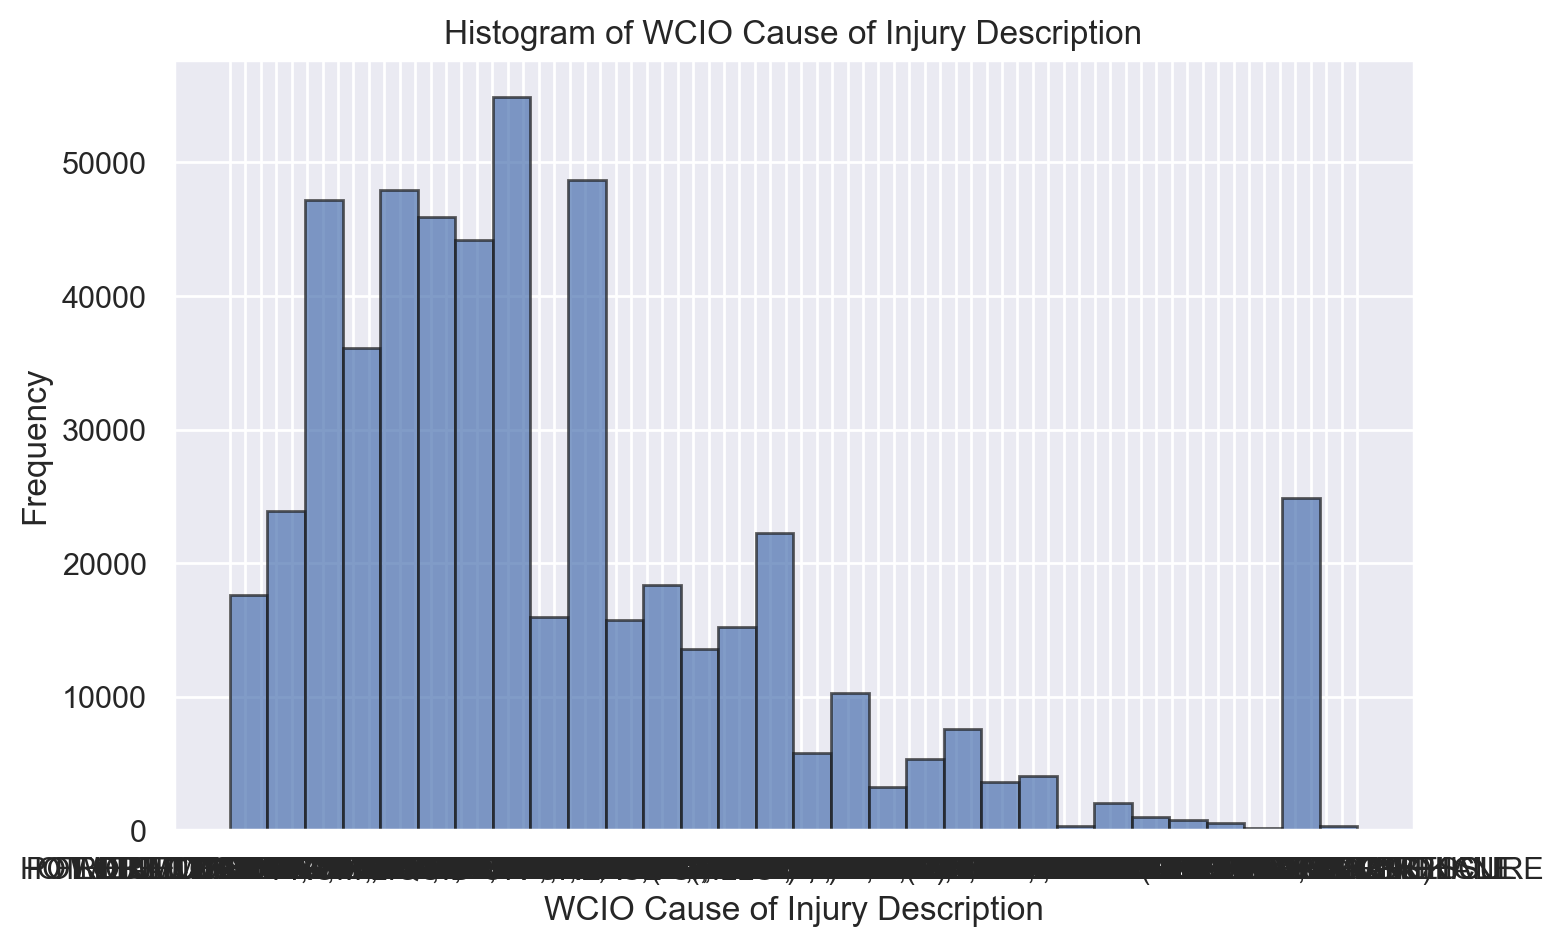

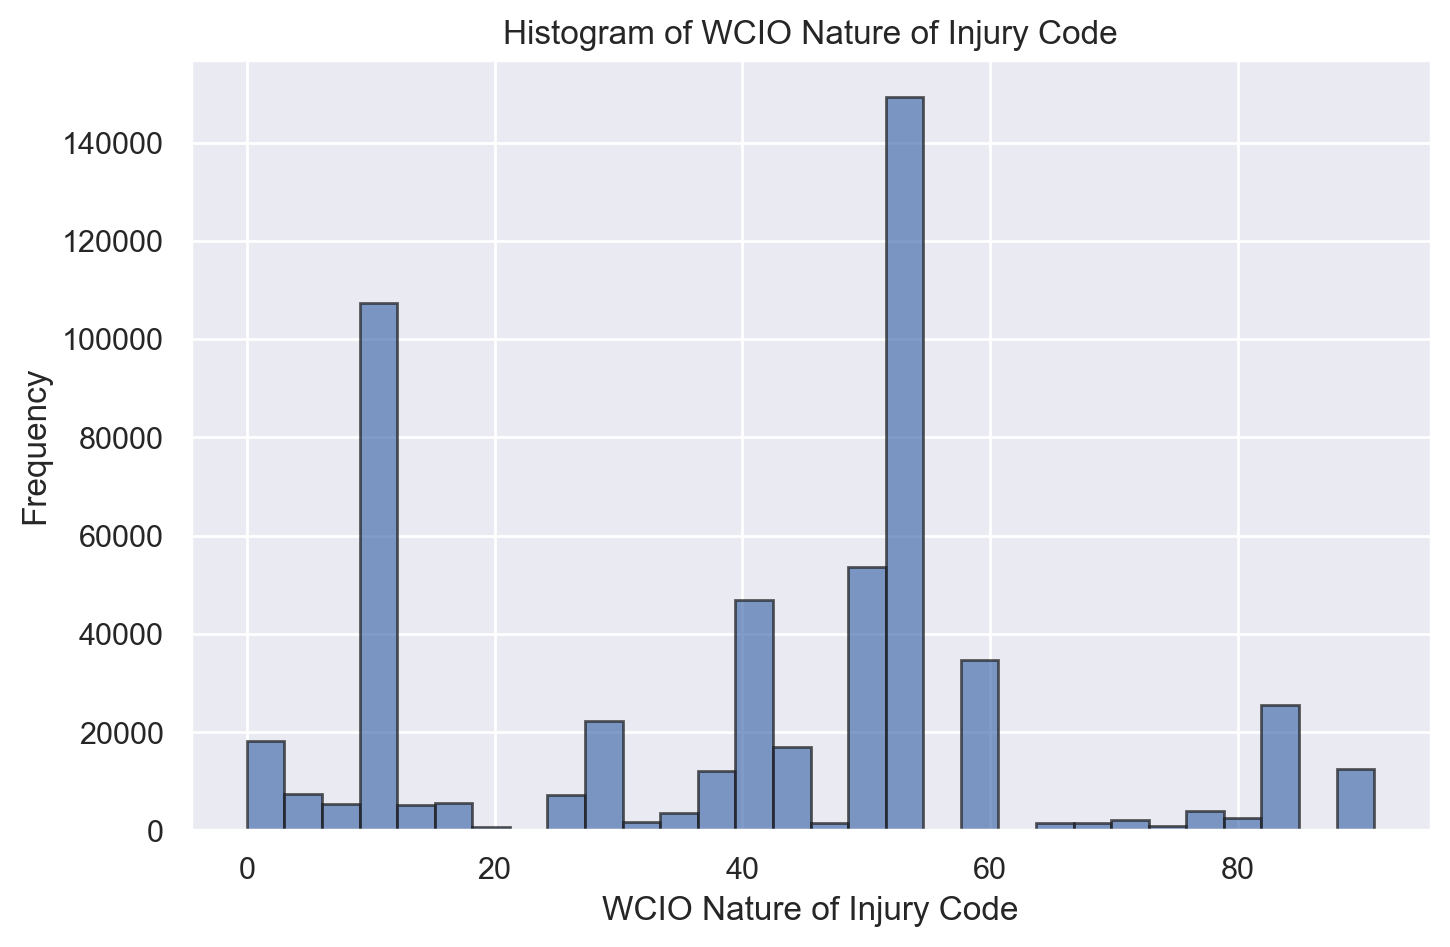

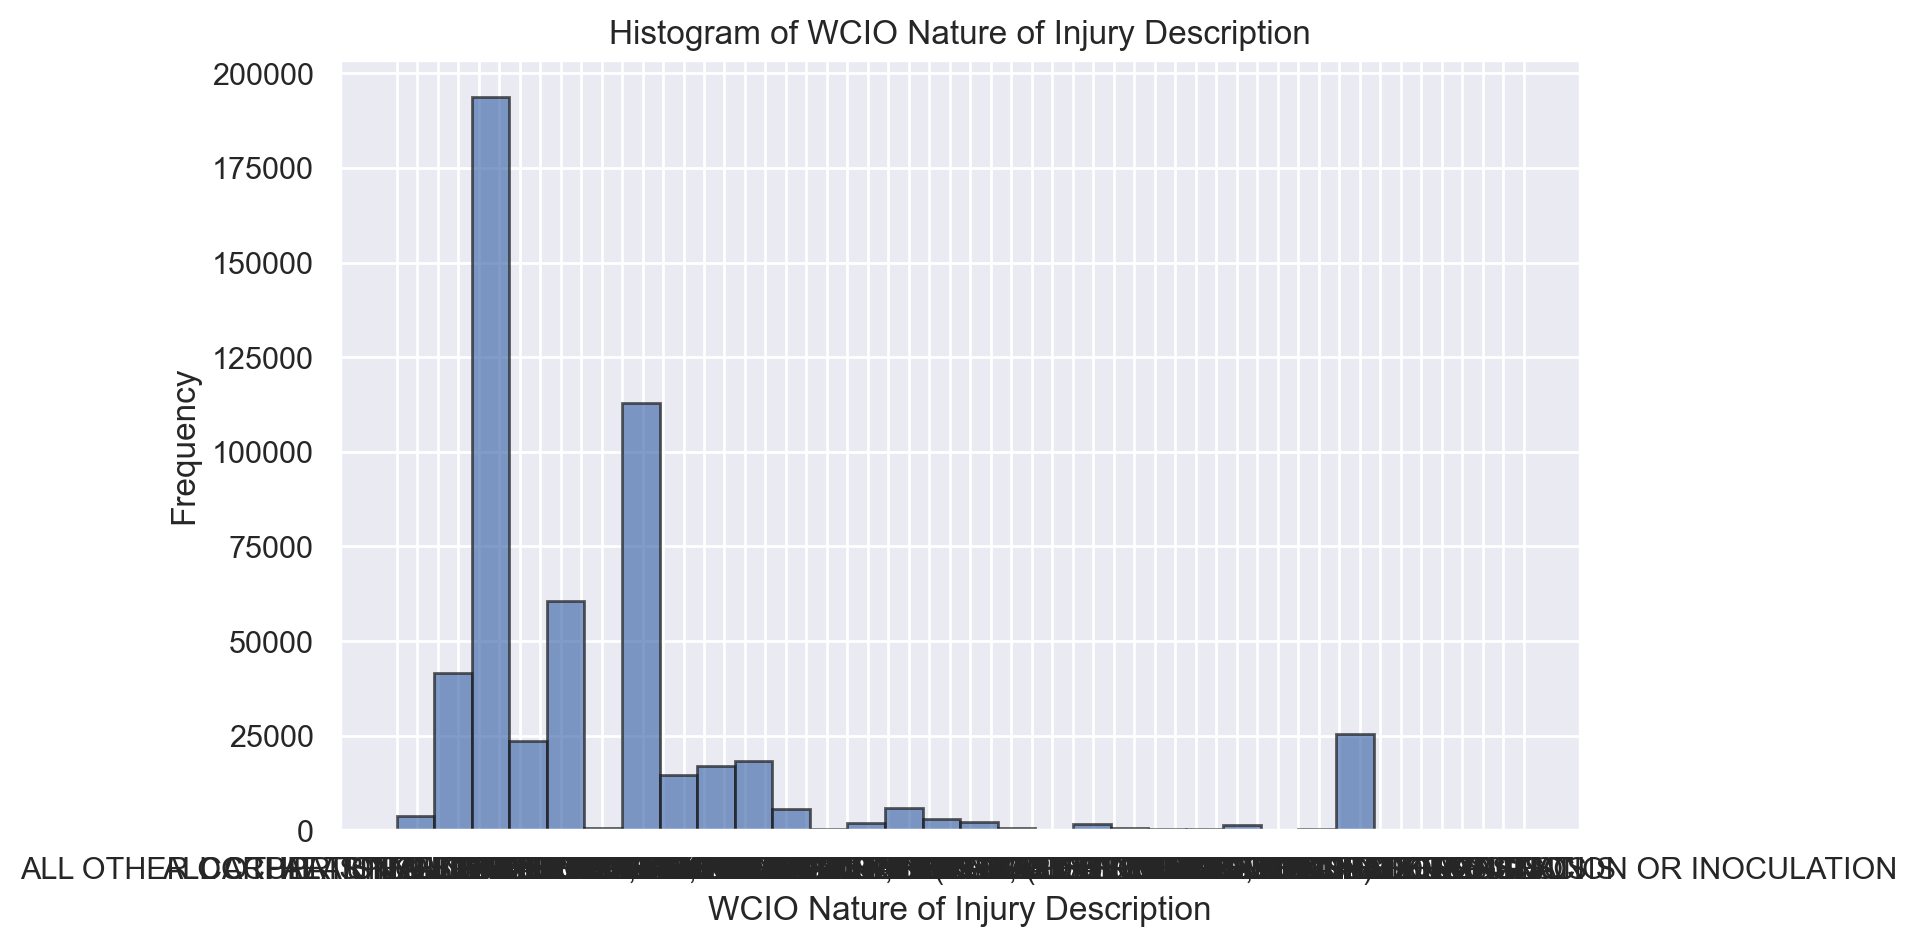

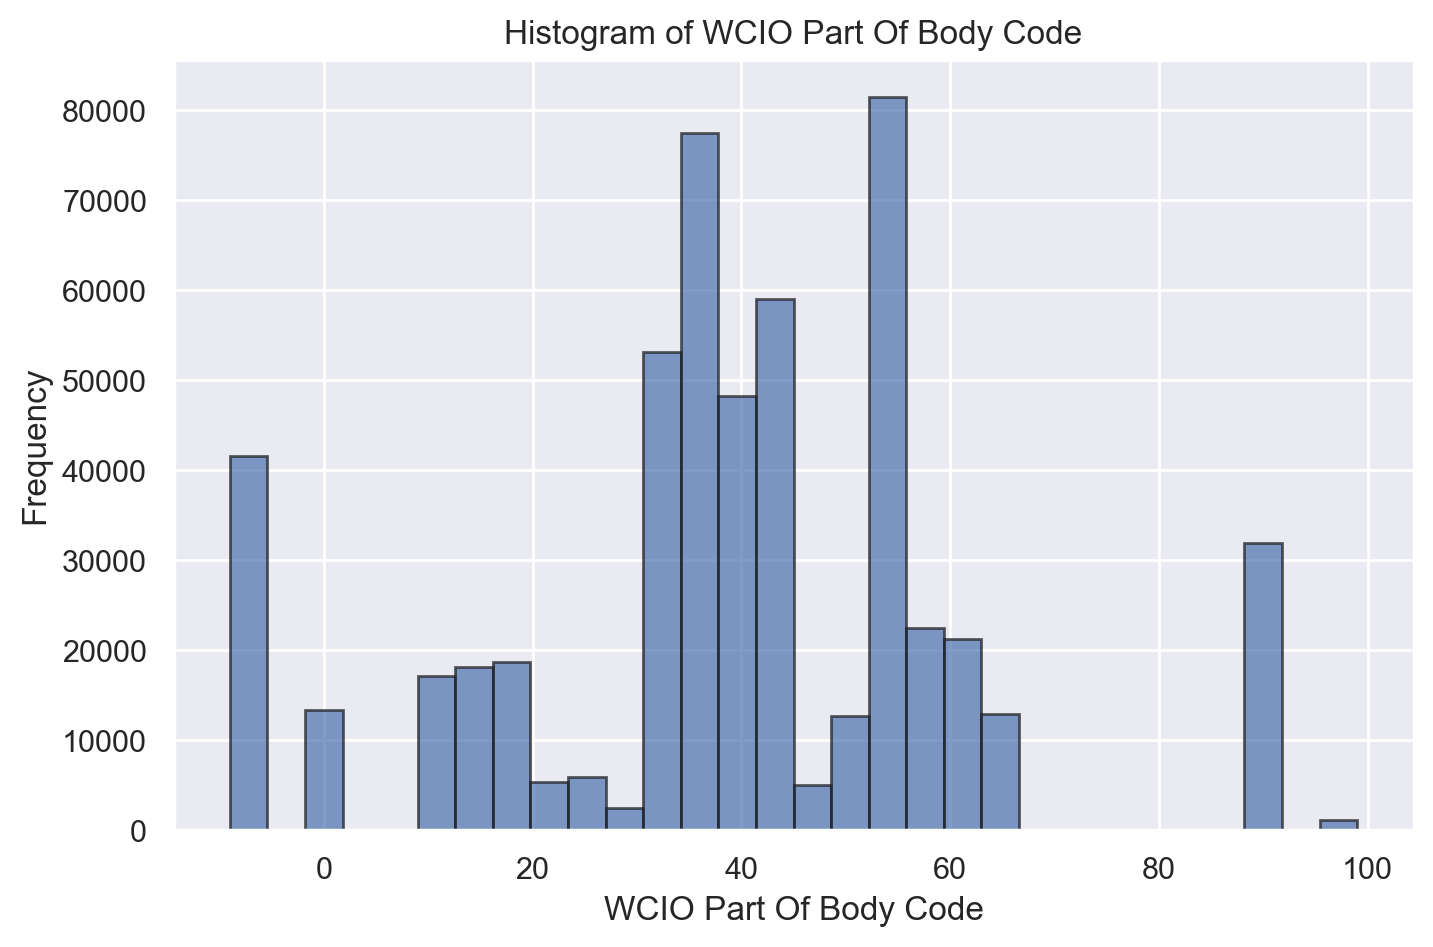

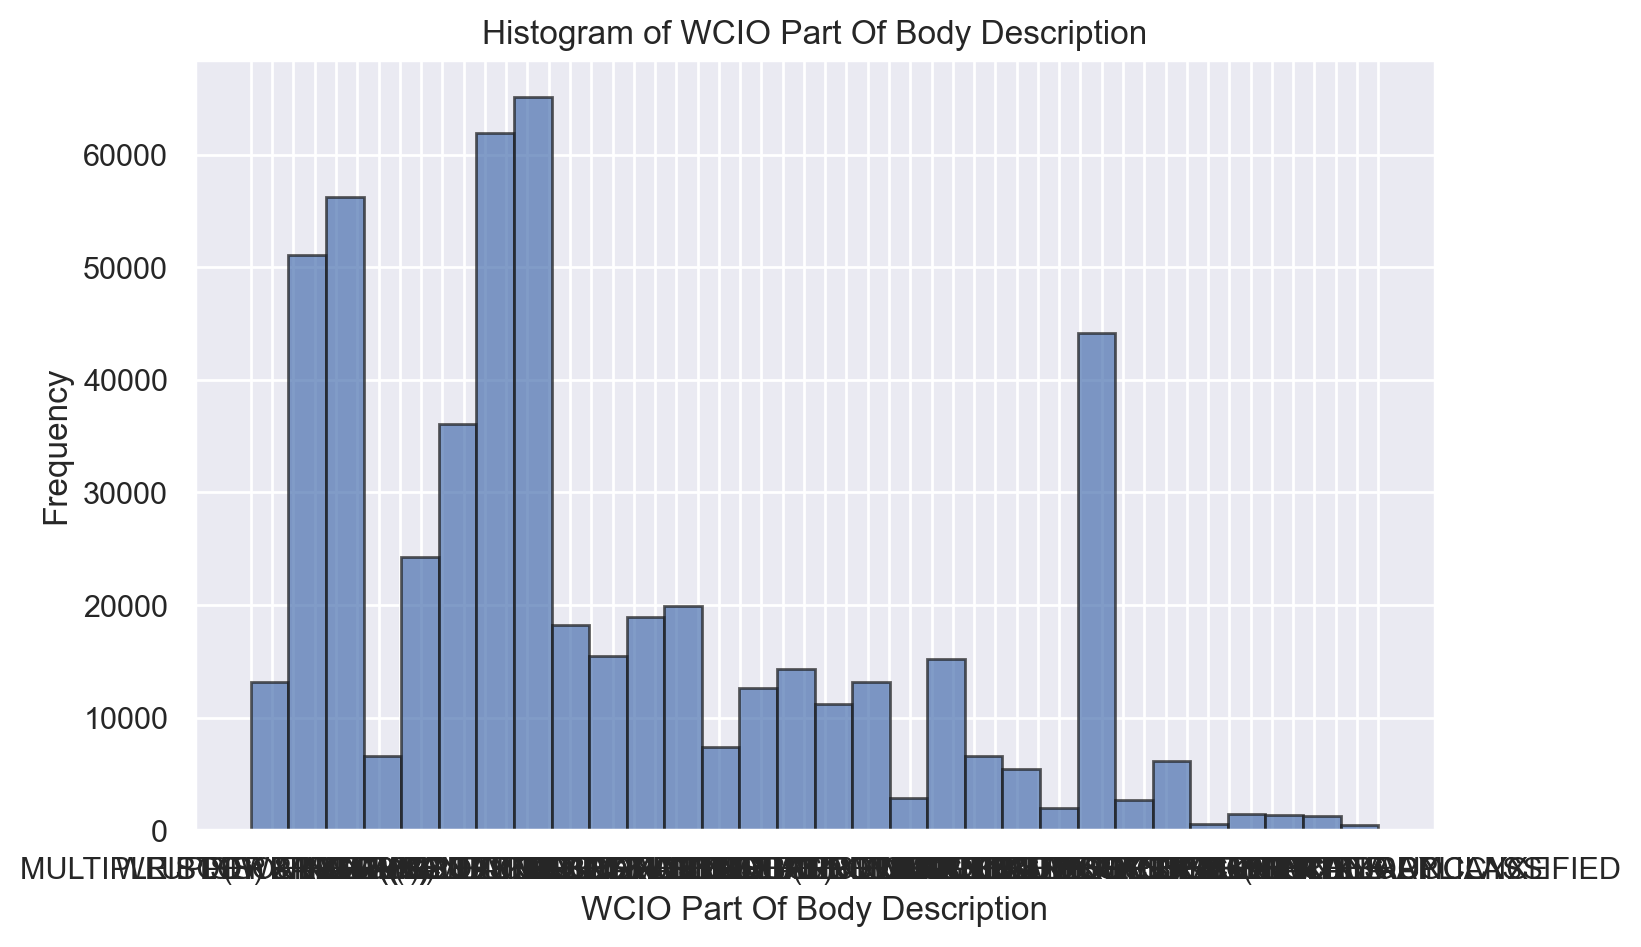

TypeError: 'value' must be an instance of str or bytes, not a float

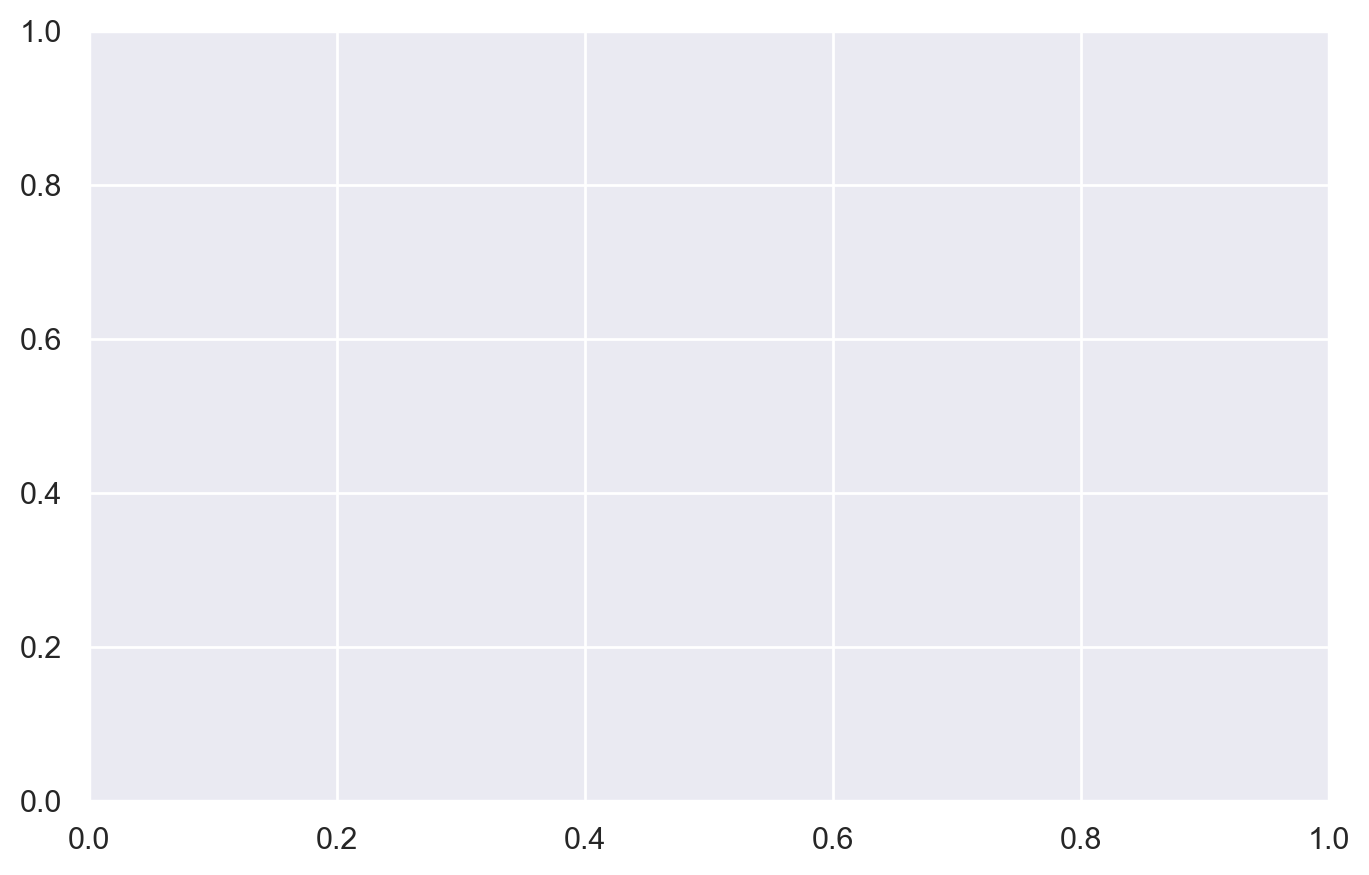

In [90]:
# Step 2: Loop through each column (variable) and create a histogram
for i in range(len(wcb.columns)):
    column_name = wcb.columns[i]  # Get the column name
    plt.figure(figsize=(8, 5))  # Optional: Set figure size for better visuals
    plt.hist(wcb[column_name].dropna(), bins=30, edgecolor='k', alpha=0.7)  # Drop NaNs and create the histogram
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)  # Optional: Add grid
    plt.show()  # Display the plot

In [ ]:
wcb['Gender'].value_counts().plot(kind='bar')

In [ ]:
wcb['Alternative Dispute Resolution'].value_counts().plot(kind='bar')

## Correlation Matrix

In [ ]:
# Step 1: Select only numerical columns
wcb = wcb.drop('OIICS Nature of Injury Description', axis=1)
numerical_df = wcb.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Optional: Adjusts the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()